**Problem Statement:**

To predict fraudulent credit card transactions with the help of machine learning models.

For banks, retaining high profitable customers is the top business goal which gets hinder by Banking frauds, where banks get substantial financial losses, trust and credibility.

In the banking industry, machine learning is used for proactive monitoring and fraud prevention mechanisms. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1sg5VR2FsPg0taxWeqkshEKn9aEDLY1TW"})  
downloaded.GetContentFile('creditcard.csv')

Step 1: Importing Data


In [ ]:
# Code to Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sn.set(style="darkgrid")
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss
from datetime import datetime as dt
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

#set pandas option to display all the rows/columns of a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# import machine learning and stats libraries
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [ ]:
# Importing credit card dataset
credit=pd.read_csv("creditcard.csv")
# Show sample data
credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Step 2: Inspecting the Dataframe


In [ ]:
credit.shape

(284807, 31)

In [ ]:
credit.describe([0.25,0.50,0.75,0.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
99%,170560.940000,2.237130e+00,3.801811e+00,2.728434e+00,4.248032e+00,3.424903e+00,4.200085e+00,2.696205e+00,2.075973e+00,2.986773e+00,3.253618e+00,2.290583e+00,1.698576e+00,2.513962e+00,2.150300e+00,1.925527e+00,1.874820e+00,2.289928e+00,2.068689e+00,2.262924e+00,2.412190e+00,1.931852e+00,1.530152e+00,1.508703e+00,1.063748e+00,1.203955e+00,1.158698e+00,9.313604e-01,5.411264e-01,1017.970000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# To find list of field with Null values in number of rows
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Check the fraud vs Non Fraudulent records
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

__Observation:__ 

492 fraudulent transactions out of 284315 total credit card transactions

No columns with NULLs

28 PCA features, Time and Amount features

In [ ]:
# check class imbalance 
(credit.groupby('Class')['Class'].count()/credit['Class'].count()) * 100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

Step 3 : EDA

([<matplotlib.axis.XTick at 0x7fcfc47bbda0>,
 [Text(0, 0, 'Non-Fraudulent'), Text(0, 0, 'Fraudulent')])

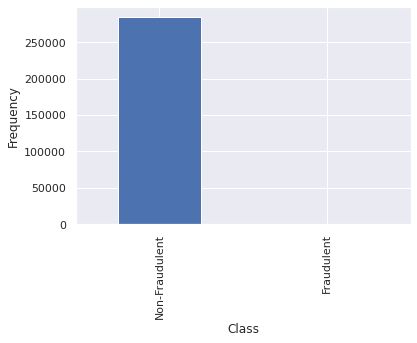

In [ ]:
#Plotting Bar graph - Fraud vs Non-Fraud transactions
count_class = pd.value_counts(credit['Class'], sort = True).sort_index()
count_class.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Non-Fraudulent","Fraudulent"])

__Observation:__ 

Percentage of Fraudulent transaction: 0.1727

Percentage of Non-Fraudulent transaction: 99.8273

It's a class imbalance problem as the fraudulent transactions are very less.


Text(0, 0.5, 'Frequency')

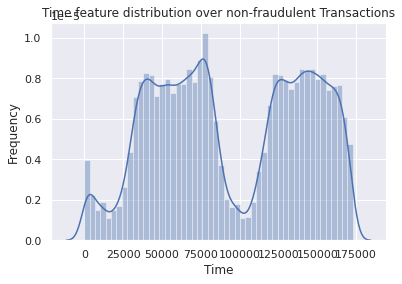

In [ ]:
# Plot data with frequency vs time 

non_fraud = credit[credit.Class == 0]
fraud = credit[credit.Class == 1]

sns.distplot(non_fraud.Time, color='b')
plt.title("Time feature distribution over non-fraudulent Transactions")
plt.xlabel("Time")
plt.ylabel("Frequency")

__Observation:__ 

Found 2 peaks in the plot, but can't find any significant trend in the plot for non fraudulent tansaction

Text(0, 0.5, 'Frequency')

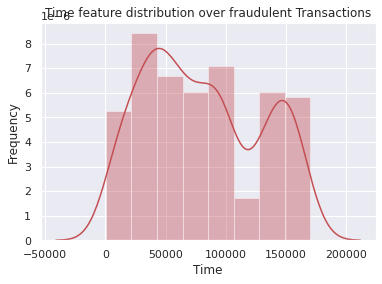

In [ ]:
# Plot data with frequency vs time

sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over fraudulent Transactions")
plt.xlabel("Time")
plt.ylabel("Frequency")

__Observation:__ 

Can't find any significant trend in the plot for fraudulent tansaction

Text(0, 0.5, 'Frequency')

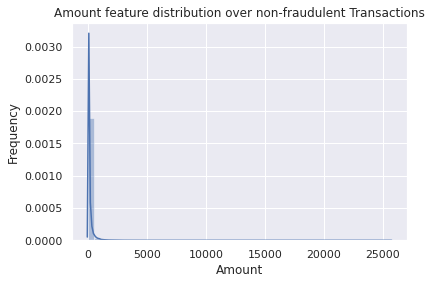

In [ ]:
# Plot data with frequency vs Amount for non-fraud transactions

sns.distplot(non_fraud.Amount, color='b')
plt.title("Amount feature distribution over non-fraudulent Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")

__Observation:__ 


Peak at the beginning signifying more transactions are on smaller amount by customers, but could reach upto 25k.

Text(0, 0.5, 'Frequency')

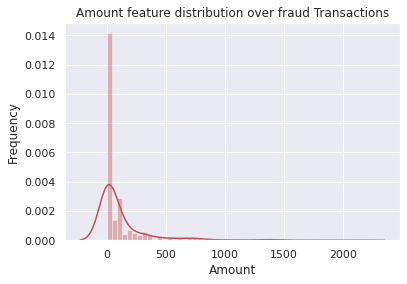

In [ ]:
# Plot data with frequency vs Amount for fraud transactions

sns.distplot(fraud.Amount, color='r')
plt.title("Amount feature distribution over fraud Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")

__Observation:__ 

Peak at the beginning signifying fradulent transactions are on smaller amount, but could reach to amount near 2k

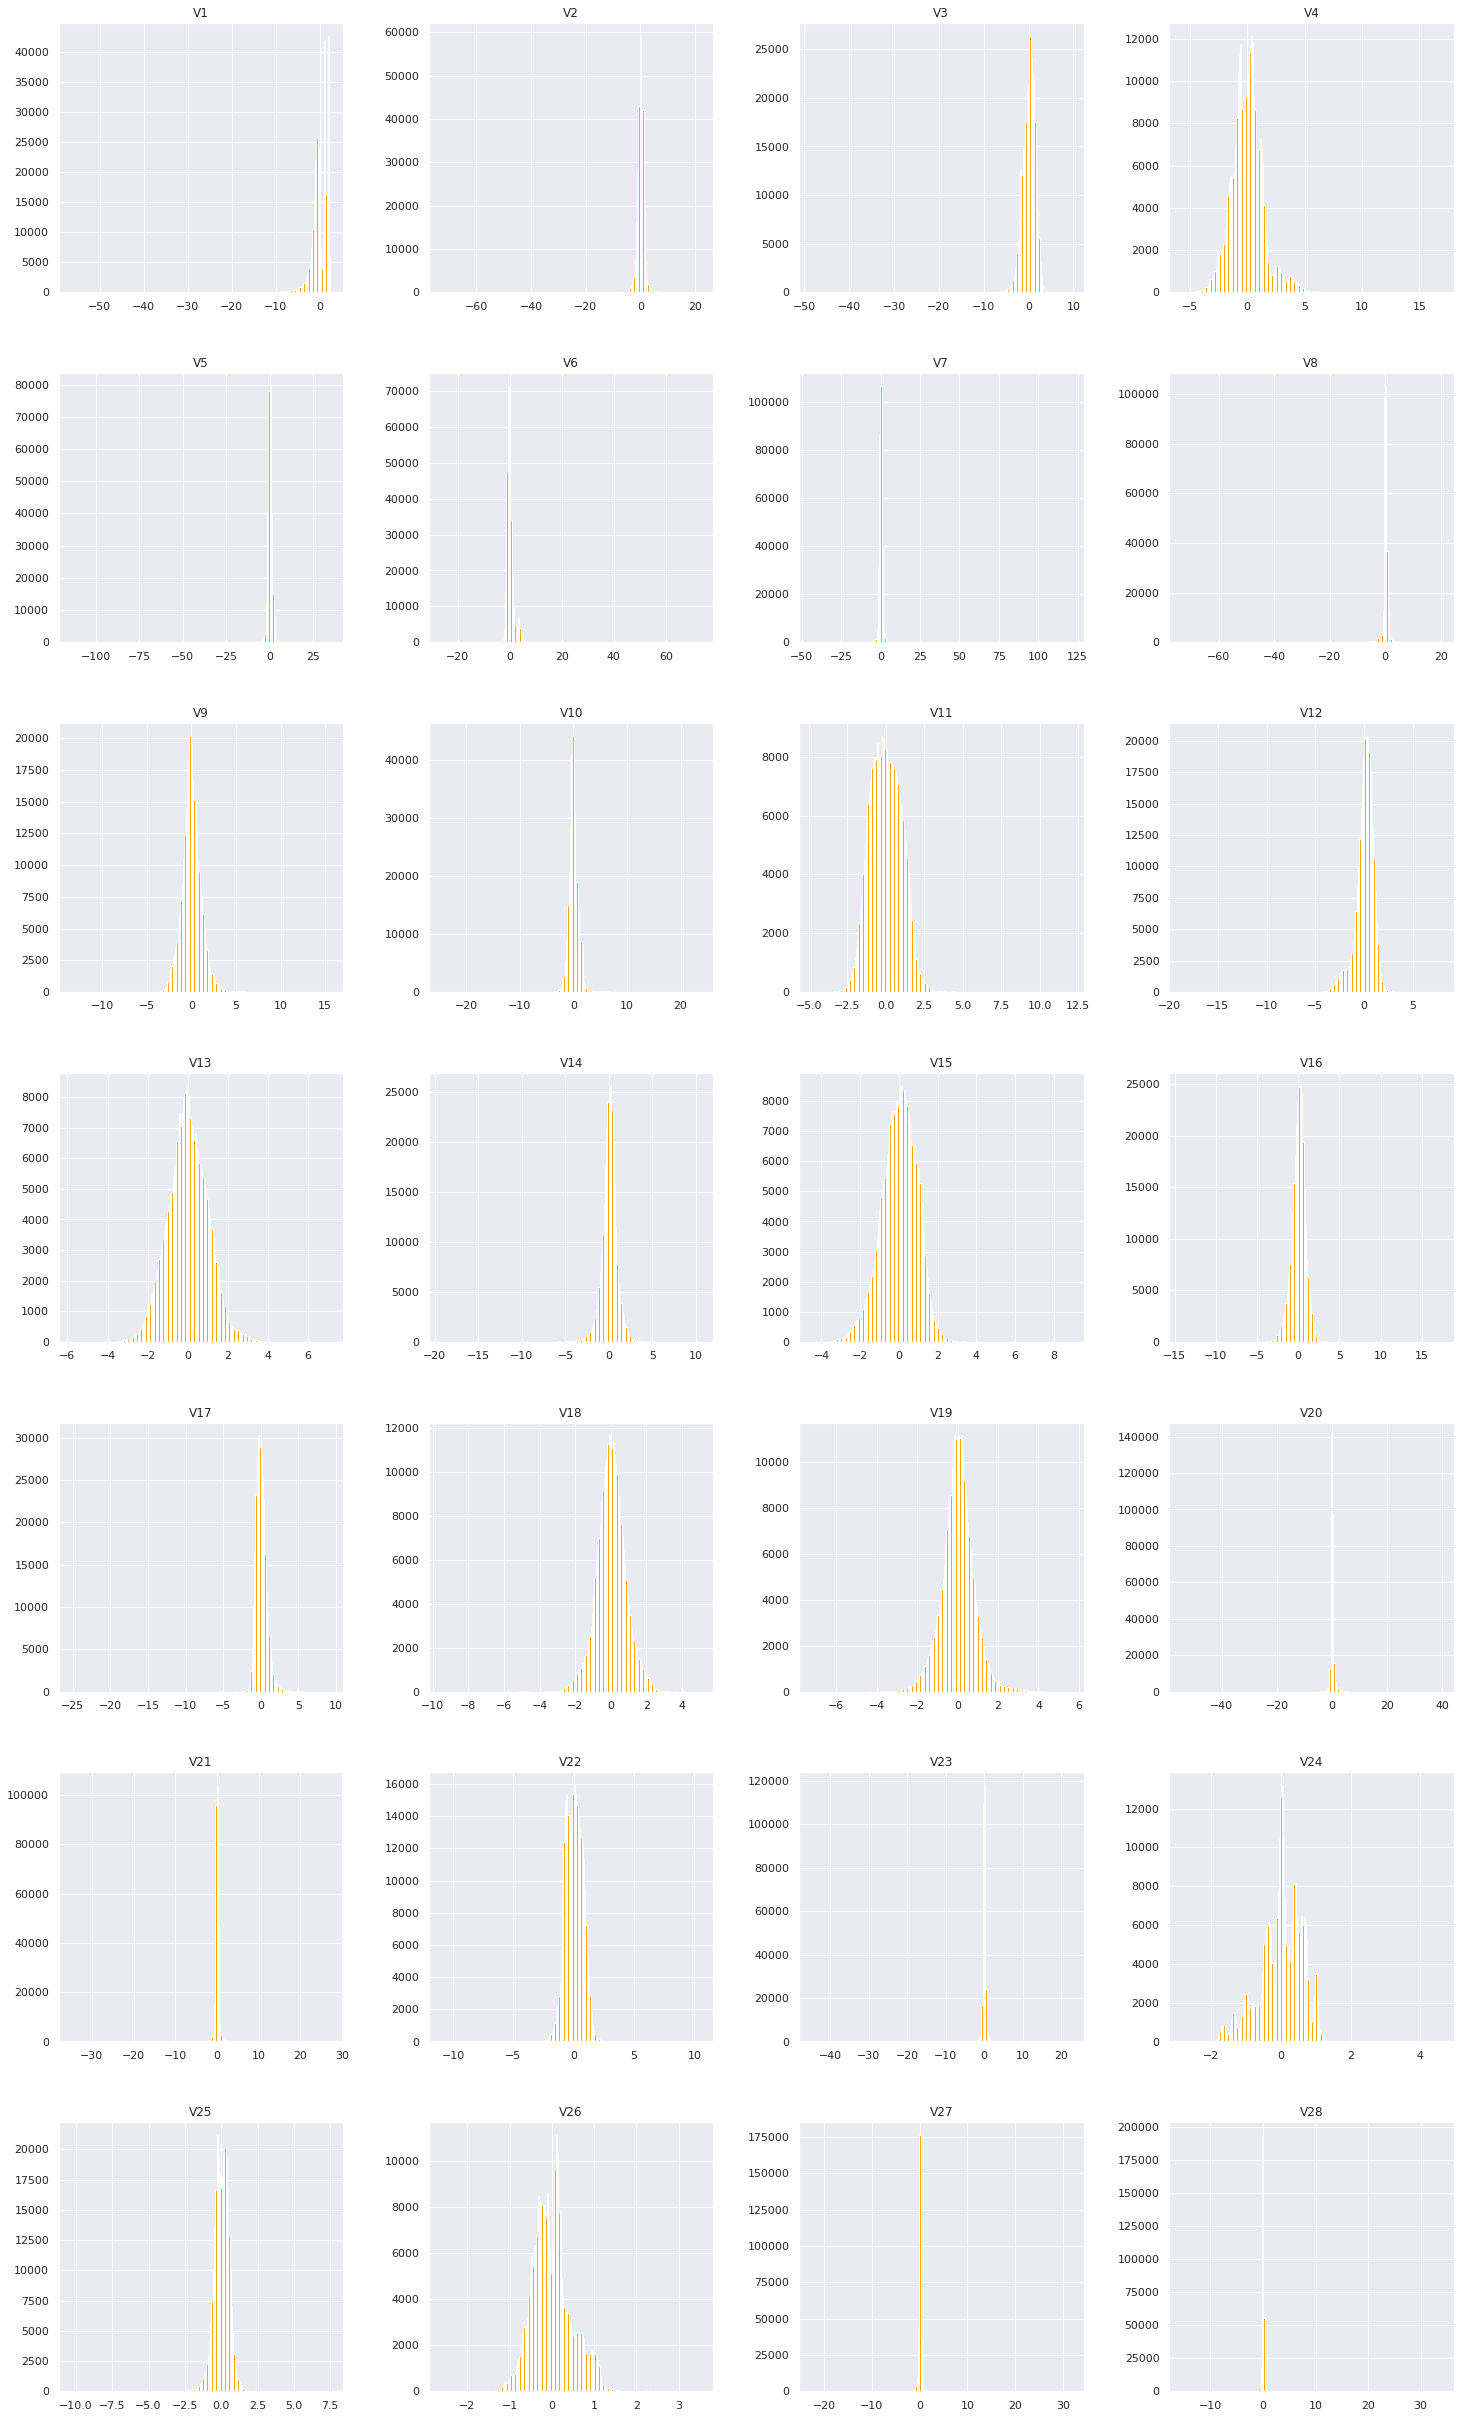

In [ ]:
#Plot distribution of all the PCA features
data = credit
data.drop(['Class','Amount','Time'], axis=1).hist(bins=200, color='Orange', figsize=(25,50), layout=(8,4))
plt.show()

__Observation:__
 
Most of the features have a normal gaussian distribution. 
Few features have their distributions skewed towards the left while others have distributions that are skewed towards right.  Almost all the features have their distributions mean at 0.

In [ ]:
# Finding the Correlation Matrix
cor = credit.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

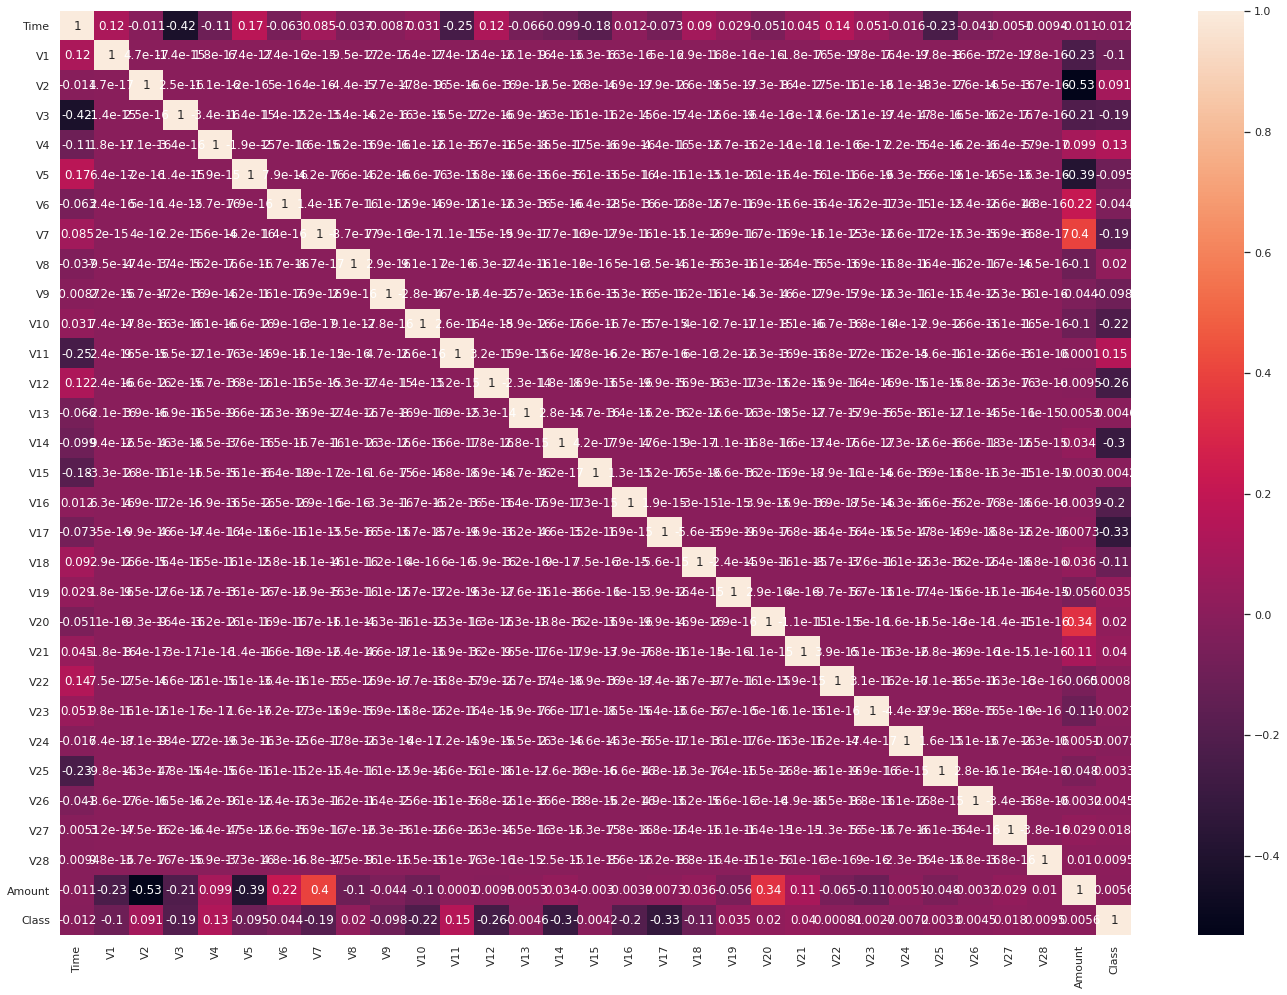

In [ ]:
# plotting Correlations on a Heatmap

plt.figure(figsize= (24,17))
sns.heatmap(cor, annot= True)
plt.show()

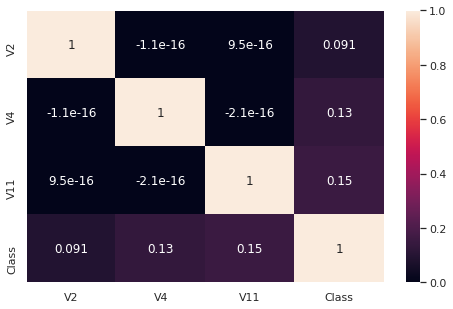

In [ ]:
#Finding the Top 3 features 

cor.index[abs(cor['Class'] > 0.09)]

top_feature = cor.index[abs(cor['Class'] > 0.09)]
plt.subplots(figsize=(8, 5))
top3_corr = credit[top_feature].corr()
sns.heatmap(top3_corr, annot= True)
plt.show()

__Observation:__

Top 3 features based on Correlation Matrix :

V2, V4 & V11

Step 4 : Model Building

In [ ]:
# Dropping unnecessary columns
credit.drop('Time', axis= 1, inplace= True)

In [ ]:
credit.shape

(284807, 30)

In [ ]:
# Need to normalize numerical Features (Amount)
scaler = StandardScaler()
credit['Amount'] = scaler.fit_transform(credit['Amount'].values.reshape(-1, 1))
credit.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
#Splitting the data into train & test data
y = credit['Class']
X = credit.drop(['Class'], axis=1)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
#Enable stratify splitting for better destribution of fraud records in test and train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.30, random_state= 100, stratify= y)

In [ ]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [ ]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [ ]:
#listing columns in a variable to be used to plot graph
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

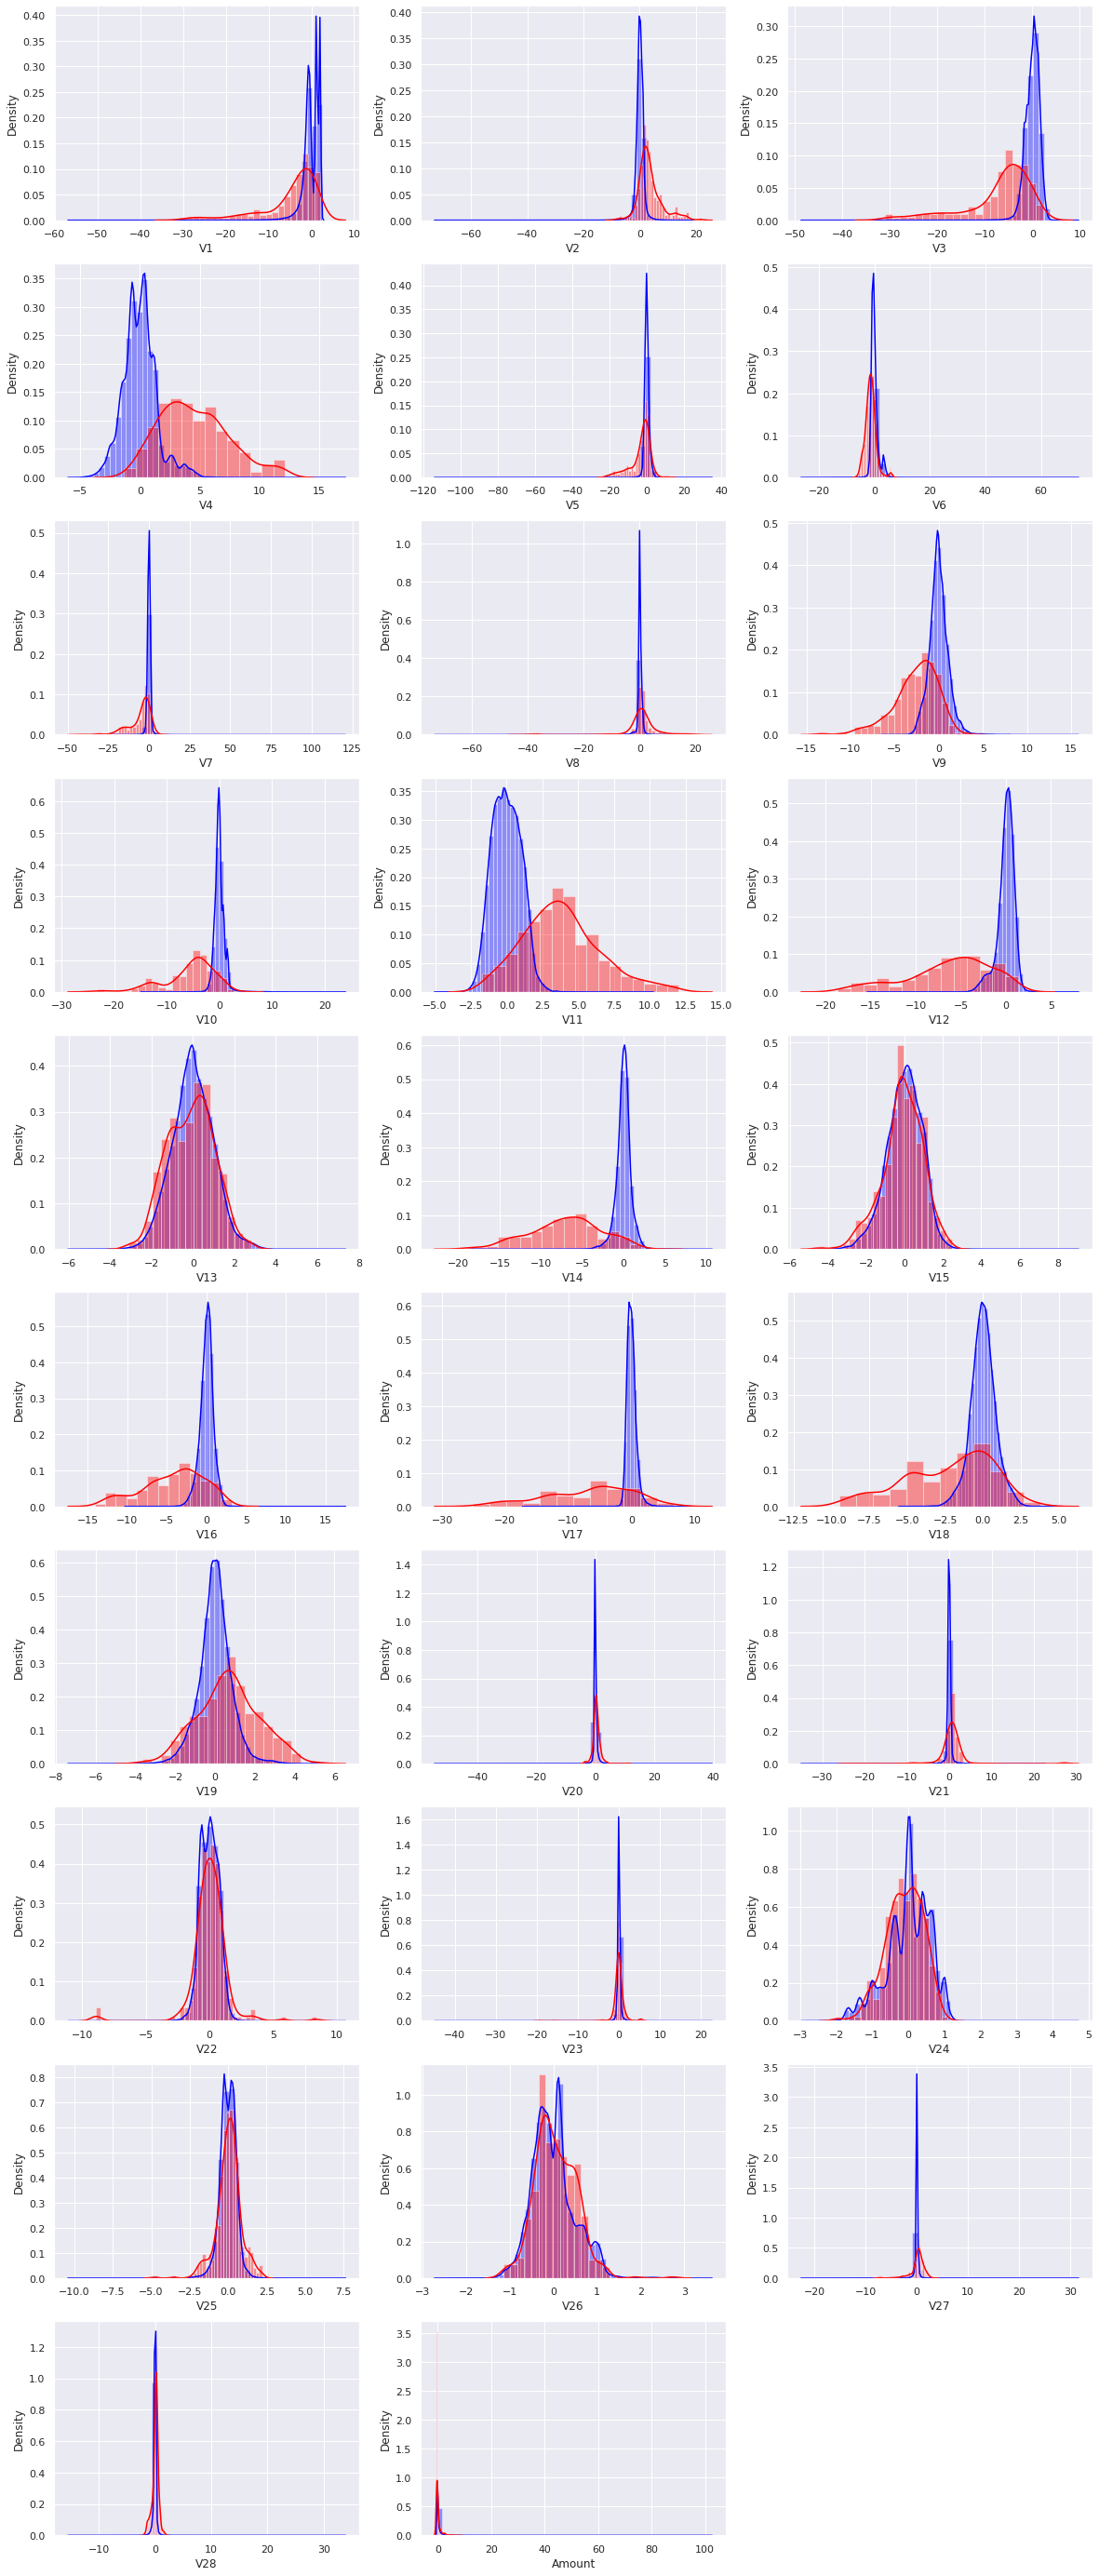

In [ ]:
# plot the histogram to see skewness in data for fraudulent vs non-fraudulent transactions
non_fraud_rec = credit.Class == 0
fraud_rec = credit.Class == 1

plt.figure(figsize= (20, 50))
for n, col in enumerate(cols):
  plt.subplot( 10, 3, n+1)
  sns.distplot(X[col][non_fraud_rec], color='blue')
  sns.distplot(X[col][fraud_rec], color='red')
plt.show()

Defining Functions for Logistic Regression, Decision Tree, Random Forest & XGBoost

In [ ]:
#Create a DataFrame to store results of various Scores
Scores = pd.DataFrame(columns= ['Imbalance_Handling_Method', 'Model', 'ROC_value', 'Accuracy', 'Threshold'])

In [ ]:
def plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Accent)
  classNames = ['Non-Fraudulent','Fraudulent']
  plt.title('Confusion Matrix')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=10)
  plt.show()

In [ ]:
def run_logistic_model(Scores, DataImbalance, X_train, y_train, X_test, y_test):

  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle= True, random_state= 50)

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C,
          penalty='l1',
          scoring='roc_auc',
          cv=cv_num,
          random_state=50,
          max_iter=10000,
          fit_intercept=True,
          solver='liblinear',
          tol=10)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C,
          penalty='l2',
          scoring='roc_auc',
          cv=cv_num,
          random_state=50,
          max_iter=10000,
          fit_intercept=True,
          solver='newton-cg',
          tol=10)

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max AUC_ROC for L1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max AUC_ROC for L2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for L1 Regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 

  print("Parameters for L2 Regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  #finding predicted values
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)
  
  #finding predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
   
  #Accuracy of L1 & L2 models
  Accuracy_l1 = metrics.accuracy_score(y_pred= y_pred_l1, y_true= y_test)
  Accuracy_l2 = metrics.accuracy_score(y_pred= y_pred_l2, y_true= y_test)

  print("Accuracy of Logistic model with L1 Regularisation: {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred_l1)
  print("Classification Report")
  print(classification_report(y_test, y_pred_l1))

  print("Accuracy of Logistic model with L2 Regularisation: {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred_l2)
  print("Classification Report")
  print(classification_report(y_test, y_pred_l2))

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("L1 ROC_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("L1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC value for the TEST dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  Scores = Scores.append(pd.DataFrame({'Imbalance_Handling_Method': DataImbalance, 'Model': 'Logistic Regression with L1 Regularisation', 'Accuracy': Accuracy_l1, 'ROC_value': l1_roc_value, 'Threshold': threshold}, index=[0]), ignore_index= True)

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("L2 ROC_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("L2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC value for the TEST dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  Scores = Scores.append(pd.DataFrame({'Imbalance_Handling_Method': DataImbalance, 'Model': 'Logistic Regression with L2 Regularisation', 'Accuracy': Accuracy_l2, 'ROC_value': l2_roc_value, 'Threshold': threshold}, index=[0]), ignore_index= True)

  return Scores

In [ ]:
def run_tree_model(Scores, DataImbalance, X_train,y_train, X_test, y_test ):

  # Decision Tree model with GINI & ENTROPY
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state= 50) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      plot_confusion_matrix(y_test, y_pred)
      print("Classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC value for the TEST dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      Scores = Scores.append(pd.DataFrame({'Imbalance_Handling_Method': DataImbalance, 'Model': 'Tree Model with {0} criteria'.format(c), 'Accuracy': test_score, 'ROC_value': tree_roc_value, 'Threshold': threshold}, index=[0]), ignore_index= True)

  return Scores

In [ ]:
def run_random_forest_model(Scores, DataImbalance, X_train, y_train, X_test, y_test):

  #Model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=50)

  #Fitting on the training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))

  # Actual Class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  plot_confusion_matrix(y_test, rf_predictions)
  print("Classification Report")

  #Plotting confusion Matrix
  print(classification_report(y_test, rf_predictions))

  #Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  #Calculating ROC & AUC
  roc_value = roc_auc_score(y_test, rf_probs)
  print("Random Forest ROC value: {0}" .format(roc_value))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest Threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC value for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  Scores = Scores.append(pd.DataFrame({'Imbalance_Handling_Method': DataImbalance,'Model': 'Random Forest', 'Accuracy': RF_test_score, 'ROC_value': roc_value, 'Threshold': threshold}, index=[0]), ignore_index= True)

  return Scores

In [ ]:
def run_XGBoost_model(Scores, DataImbalance, X_train, y_train, X_test, y_test ):
  
  XGBmodel = XGBClassifier( random_state=50)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))
  
  # Probabilities for Each Class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculating ROC &  AOC
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost ROC value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  Scores = Scores.append(pd.DataFrame({'Imbalance_Handling_Method': DataImbalance, 'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'ROC_value': XGB_roc_value, 'Threshold': threshold}, index=[0]), ignore_index= True)

  return Scores

As skewness is present in the data distribution we are using "Power Transformer" package present in the imblearn preprocessing library provided by sklearn to make distribution more Gaussian

In [ ]:
pt = PowerTransformer()
#Fitting the PowerTransformer on training data
pt.fit(X_train)                       
#Transforming the PowerTransformer on data
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [ ]:
#Creating Dataframe for test & train
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)

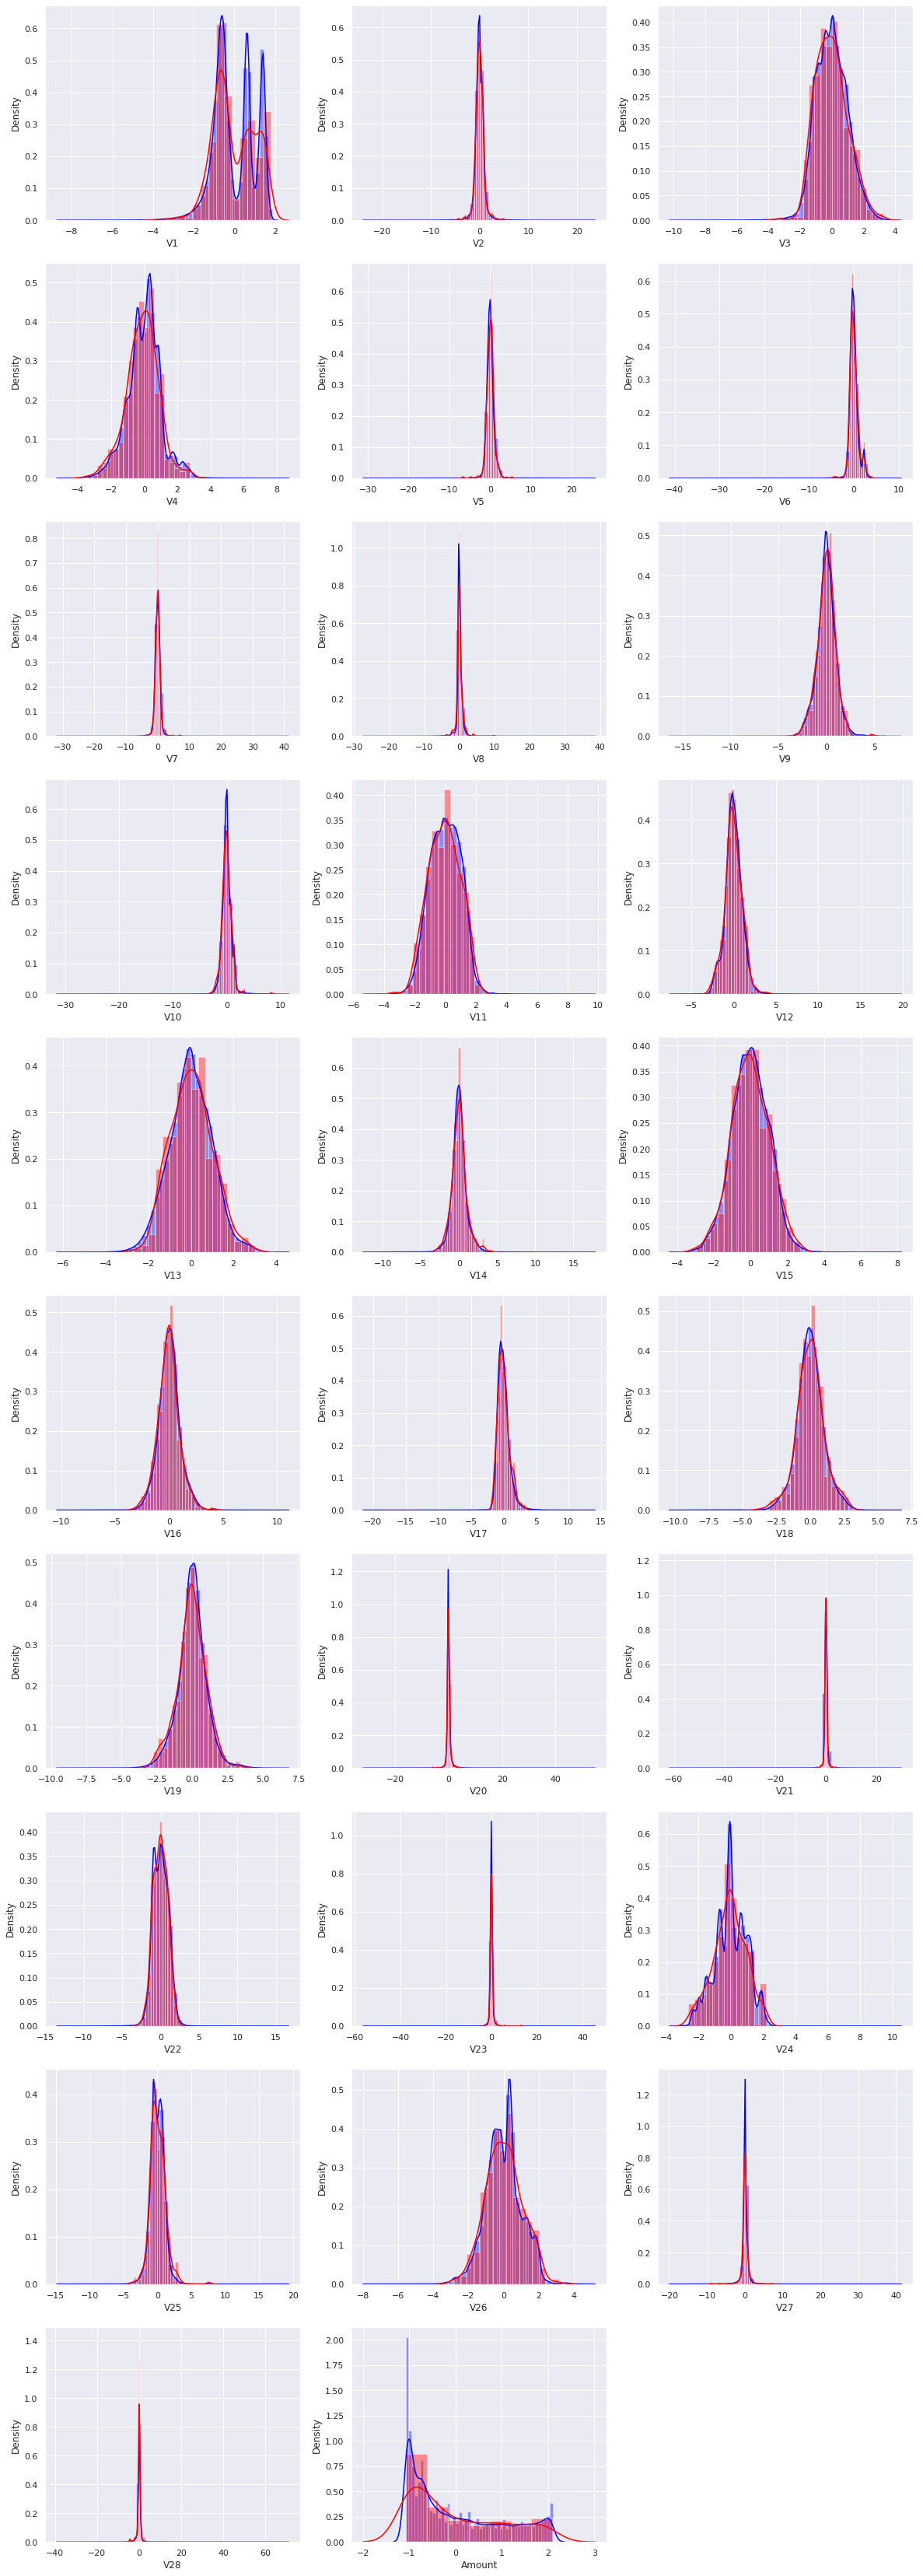

In [ ]:
# plotting the histogram of features from  train dataset to see the result affect of PowerTransformer 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][non_fraud_rec], color='blue')
  sns.distplot(X_train_pt_df[col][fraud_rec], color='red')
plt.show()

Max AUC_ROC for L1: 0.981914446450984
Max AUC_ROC for L2: 0.9794415892508344
Parameters for L1 Regularisations
[[-0.16041762  0.07620275 -0.22614799  0.35629884  0.00570942 -0.04588952
  -0.09110705 -0.12206326 -0.10403325 -0.19657492  0.18660217 -0.30613819
  -0.02691693 -0.35338343 -0.05790705 -0.21311323 -0.1038656   0.0450132
  -0.0531894  -0.00765761  0.02301113  0.01217277 -0.04907767 -0.02421276
  -0.00655358  0.02928586 -0.04573455 -0.00907562 -0.03063397]]
[-6.83185871]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.91948253, 0.99399193, 0.99763526,
        0.99702232, 0.99703213, 0.99431801, 0.99725769, 0.99714123,
        0.99847622, 0.99659694, 0.99216536, 0.98519864, 0.99736312],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.84321472, 0.94791389, 0.96333696,
        0.97367649, 0.94313731, 0.94301508, 0.97111775, 0.97109602,
        0.96366834, 0.95799402, 0.9

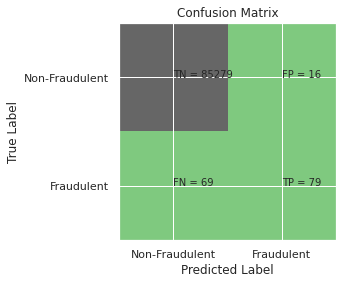

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.53      0.65       148

    accuracy                           1.00     85443
   macro avg       0.92      0.77      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of Logistic model with L2 Regularisation: 0.9990754069964772
Confusion Matrix


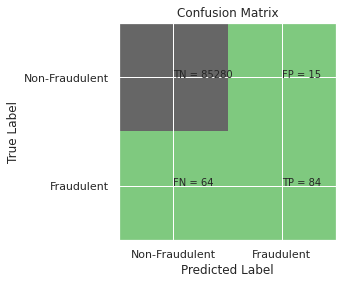

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.57      0.68       148

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443

L1 ROC_value: 0.9760951261361601
L1 threshold: 0.0035910750822254578
ROC value for the TEST dataset 97.6%


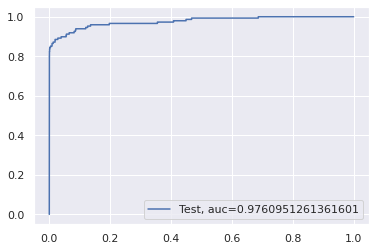

L2 ROC_value: 0.97568945931687
L2 threshold: 0.0013610450666779418
ROC value for the TEST dataset 97.6%


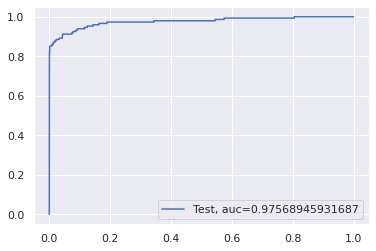

gini score: 0.9989583699074237
Confusion Matrix


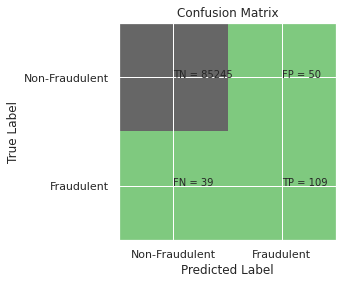

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.69      0.74      0.71       148

    accuracy                           1.00     85443
   macro avg       0.84      0.87      0.85     85443
weighted avg       1.00      1.00      1.00     85443

gini tree_roc_value: 0.8679501428270405
Tree threshold: 1.0
ROC value for the TEST dataset 86.8%


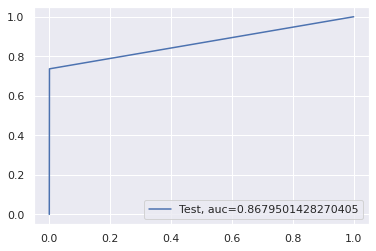

entropy score: 0.9991807403766253
Confusion Matrix


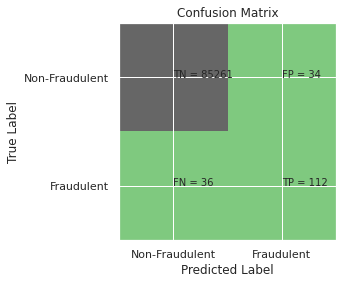

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

entropy tree_roc_value: 0.8781790700953607
Tree threshold: 1.0
ROC value for the TEST dataset 87.8%


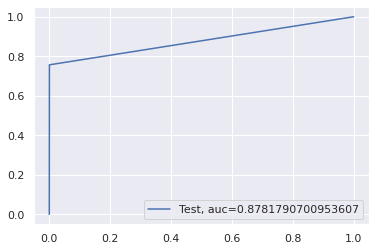

Model Accuracy: 0.9994967405170698
Confusion Matrix


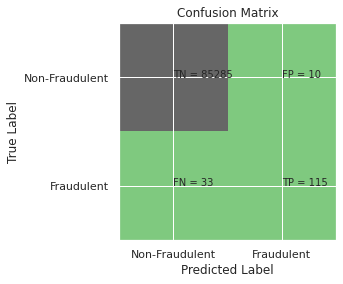

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest ROC value: 0.9443597973963177
Random Forest Threshold: 0.01
ROC value for the test dataset 94.4%


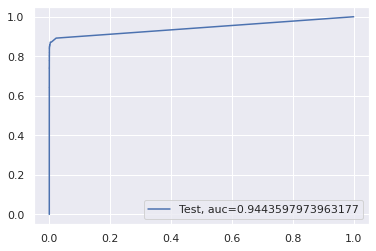

Model Accuracy: 0.9994382219725431
Confusion Matrix


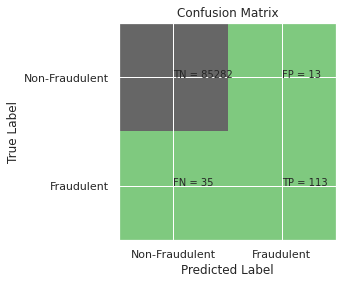

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

XGboost ROC value: 0.9769486028616107
XGBoost threshold: 0.002408236963674426
ROC for the test dataset 97.7%


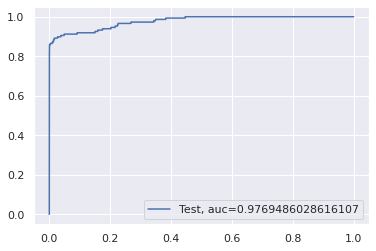

In [ ]:
Scores = run_logistic_model(Scores, "Power_Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
Scores = run_tree_model(Scores, "Power_Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
Scores = run_random_forest_model(Scores, "Power_Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
Scores = run_XGBoost_model(Scores, "Power_Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)

In [ ]:
Scores

,Imbalance_Handling_Method,Model,ROC_value,Accuracy,Threshold
0,Power_Transformer,Logistic Regression with L1 Regularisation,0.976095,0.999005,0.003591
1,Power_Transformer,Logistic Regression with L2 Regularisation,0.975689,0.999075,0.001361
2,Power_Transformer,Tree Model with gini criteria,0.867950,0.998958,1.000000
3,Power_Transformer,Tree Model with entropy criteria,0.878179,0.999181,1.000000
4,Power_Transformer,Random Forest,0.944360,0.999497,0.010000
5,Power_Transformer,XGBoost,0.976949,0.999438,0.002408


__Observation:__

Performing different models on imbalance dataset suggests that the XGBoost with Power_Transformer is the best with best ROC value & Accuracy values

Performing Cross Validation with "RepeatedKFold":


In [ ]:
# Repeated K-Fold 
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=50)
# X is the feature set and y is the target
for train_index, test_index in rkfold.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

Train: [     1      2      3 ... 284803 284804 284805] Test: [     0     15     17 ... 284797 284802 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     6     10     13 ... 284787 284788 284798]
Train: [     0      1      2 ... 284802 284804 284806] Test: [     3      4      5 ... 284801 284803 284805]
Train: [     0      1      3 ... 284803 284805 284806] Test: [     2     36     38 ... 284794 284795 284804]
Train: [     0      2      3 ... 284804 284805 284806] Test: [     1      7      8 ... 284781 284782 284796]
Train: [     0      1      2 ... 284802 284803 284806] Test: [     8      9     10 ... 284801 284804 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     25     29 ... 284792 284798 284803]
Train: [     1      2      3 ... 284804 284805 284806] Test: [     0     18     28 ... 284795 284800 284802]
Train: [     0      2      3 ... 284803 284804 284805] Test: [     1      4      6 ... 284793 284799 284806]
Train: [     0     

Max AUC_ROC for L1: 0.9799179239794308
Max AUC_ROC for L2: 0.9796525341836612
Parameters for L1 Regularisations
[[-0.02583736  0.03634129 -0.02227456  0.18885249  0.07267715 -0.04064721
  -0.00944816 -0.11458299 -0.10448627 -0.20322655  0.10852571 -0.20521684
  -0.0712295  -0.35238498 -0.02362134 -0.20150667 -0.10778793  0.04303714
  -0.02305871 -0.01975592  0.03761247  0.05070472 -0.06240322 -0.0275017
  -0.0219935   0.04922117  0.00796605  0.07195098  0.015853  ]]
[-6.82310646]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.95308809, 0.95576629, 0.95211977,
        0.95469964, 0.95005125, 0.95194392, 0.94211614, 0.94555095,
        0.95337615, 0.94711738, 0.94996448, 0.94002911, 0.95008711],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.95067751, 0.96656705, 0.96258405,
        0.96967846, 0.96621109, 0.96805977, 0.96704168, 0.96441368,
        0.9649967 , 0.96617447, 0.

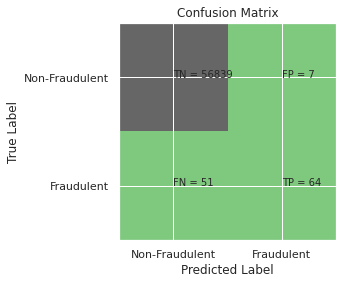

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       0.90      0.56      0.69       115

    accuracy                           1.00     56961
   macro avg       0.95      0.78      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 Regularisation: 0.9989290918347641
Confusion Matrix


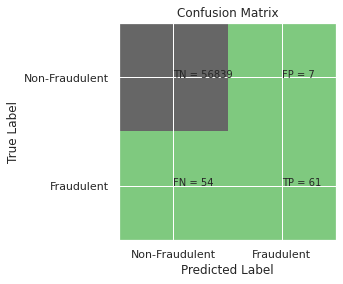

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       0.90      0.53      0.67       115

    accuracy                           1.00     56961
   macro avg       0.95      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

L1 ROC_value: 0.9867383885371461
L1 threshold: 0.002880795683990657
ROC value for the TEST dataset 98.7%


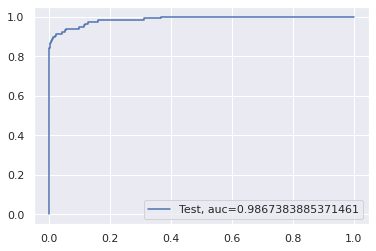

L2 ROC_value: 0.9902376978839855
L2 threshold: 0.0016625008189269696
ROC value for the TEST dataset 99.0%


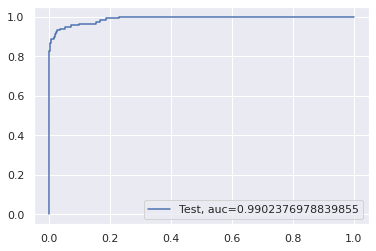

gini score: 0.9990870946788153
Confusion Matrix


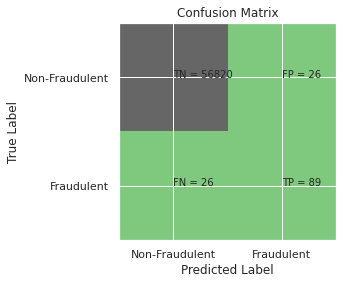

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       0.77      0.77      0.77       115

    accuracy                           1.00     56961
   macro avg       0.89      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.886727833704792
Tree threshold: 1.0
ROC value for the TEST dataset 88.7%


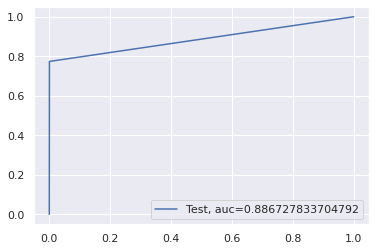

entropy score: 0.9993855444953564
Confusion Matrix


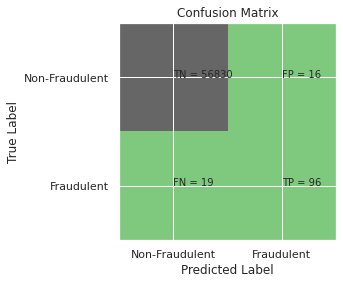

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       0.86      0.83      0.85       115

    accuracy                           1.00     56961
   macro avg       0.93      0.92      0.92     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9172505732497718
Tree threshold: 1.0
ROC value for the TEST dataset 91.7%


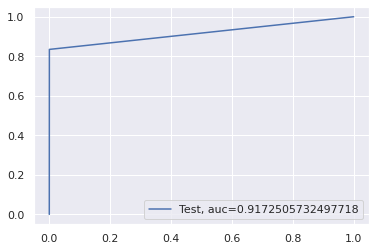

Model Accuracy: 0.9995611032109689
Confusion Matrix


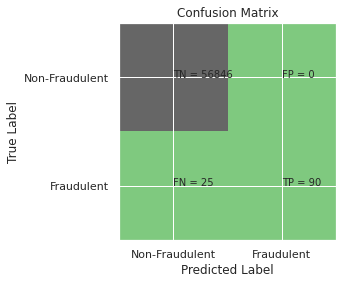

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       1.00      0.78      0.88       115

    accuracy                           1.00     56961
   macro avg       1.00      0.89      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC value: 0.9504582173958934
Random Forest Threshold: 0.01
ROC value for the test dataset 95.0%


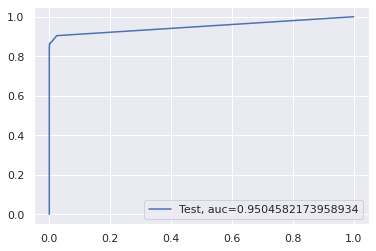

Model Accuracy: 0.999490879724724
Confusion Matrix


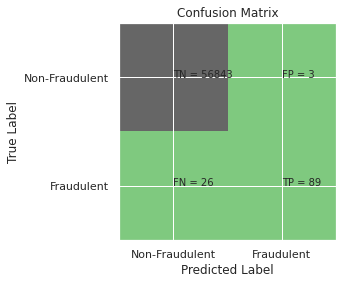

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       0.97      0.77      0.86       115

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.9829806387662166
XGBoost threshold: 0.0014478967059403658
ROC for the test dataset 98.3%


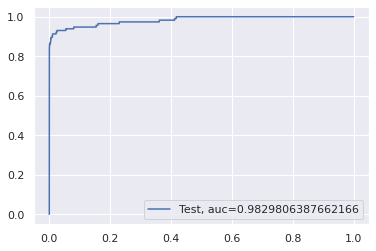

In [ ]:
Scores = run_logistic_model(Scores, "Repeated K-Fold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
Scores = run_tree_model(Scores,"Repeated K-Fold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
Scores = run_random_forest_model(Scores, "Repeated K-Fold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
Scores = run_XGBoost_model(Scores, "Repeated K-Fold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)

In [ ]:
Scores[Scores['Imbalance_Handling_Method'] == 'Repeated K-Fold Cross Validation']

,Imbalance_Handling_Method,Model,ROC_value,Accuracy,Threshold
6,Repeated K-Fold Cross Validation,Logistic Regression with L1 Regularisation,0.986738,0.998982,0.002881
7,Repeated K-Fold Cross Validation,Logistic Regression with L2 Regularisation,0.990238,0.998929,0.001663
8,Repeated K-Fold Cross Validation,Tree Model with gini criteria,0.886728,0.999087,1.000000
9,Repeated K-Fold Cross Validation,Tree Model with entropy criteria,0.917251,0.999386,1.000000
10,Repeated K-Fold Cross Validation,Random Forest,0.950458,0.999561,0.010000
11,Repeated K-Fold Cross Validation,XGBoost,0.982981,0.999491,0.001448


__Observation:__

Performing different models on imbalance dataset suggests that the Logistic Regression with L2 Regularisation with Repeated K-Fold cross validation is the best with ROC value and accuracy

Performing cross validation with "Stratified K-Fold"

In [ ]:
skfold = StratifiedKFold(n_splits=5, random_state=50)
#X is the feature set with y as the target
for train_index, test_index in skfold.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    X_train_SKFold_cv, X_test_SKFold_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKFold_cv, y_test_SKFold_cv = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


Max AUC_ROC for L1: 0.9776793573802529
Max AUC_ROC for L2: 0.982532706342524
Parameters for L1 Regularisations
[[ 1.79355696e-02  1.20477003e-02 -1.11237257e-01  6.23465922e-02
   4.25135837e-02 -3.67897276e-02 -1.24387200e-02 -6.36683646e-02
  -5.69341718e-02 -1.10825364e-01  3.83259800e-02 -1.18976567e-01
  -3.59207803e-02 -2.67414857e-01 -5.95738730e-02 -9.44445702e-02
  -1.31356141e-01 -2.57914968e-04  1.62830389e-02 -2.58170765e-02
   4.62871708e-02  6.33636167e-02  7.15243348e-03 -1.38266191e-02
  -1.60859657e-01  1.73314181e-02 -3.47357616e-02 -3.09970102e-03
   9.75166577e-03]]
[-5.08741644]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.93780253, 0.95148879, 0.94418404,
        0.96152043, 0.93486598, 0.9384293 , 0.95422582, 0.93666286,
        0.94501597, 0.94280877, 0.94028029, 0.94854998, 0.94789391],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.90623669, 0.94

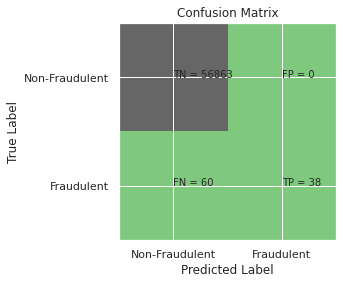

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.39      0.56        98

    accuracy                           1.00     56961
   macro avg       1.00      0.69      0.78     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 Regularisation: 0.998771088990713
Confusion Matrix


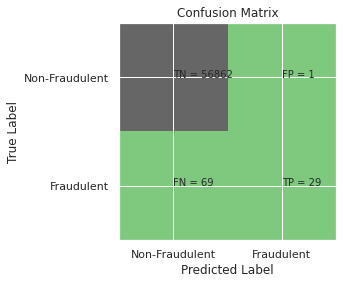

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

L1 ROC_value: 0.9815345655347062
L1 threshold: 0.010883921806354896
ROC value for the TEST dataset 98.2%


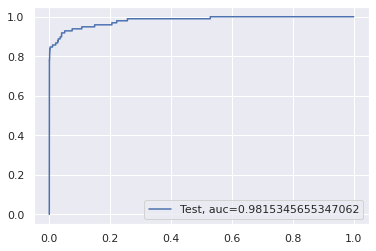

L2 ROC_value: 0.9829762691352326
L2 threshold: 0.0014555168793554452
ROC value for the TEST dataset 98.3%


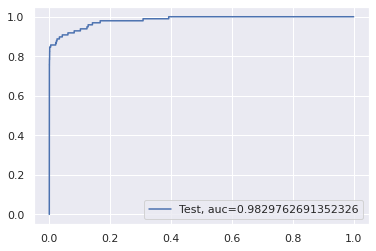

gini score: 0.9988764242200804
Confusion Matrix


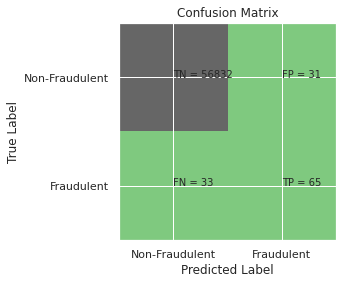

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.68      0.66      0.67        98

    accuracy                           1.00     56961
   macro avg       0.84      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8313600680762606
Tree threshold: 1.0
ROC value for the TEST dataset 83.1%


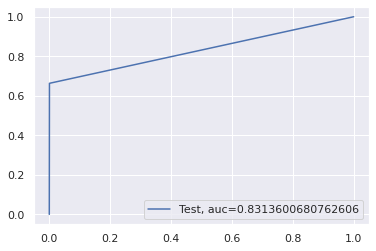

entropy score: 0.9989817594494479
Confusion Matrix


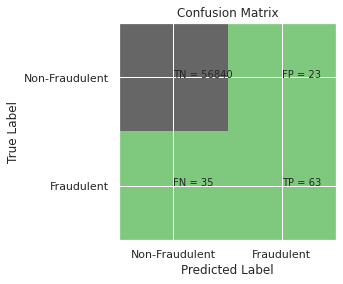

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.73      0.64      0.68        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212263309558563
Tree threshold: 1.0
ROC value for the TEST dataset 82.1%


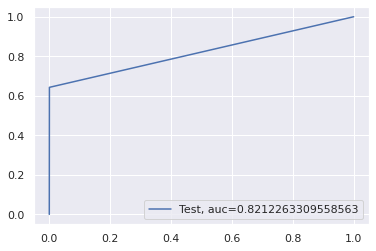

Model Accuracy: 0.9994557679816014
Confusion Matrix


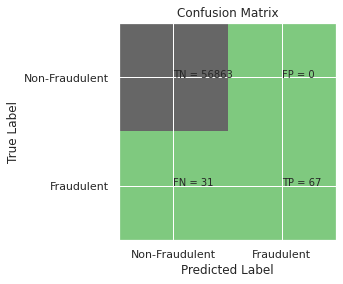

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       1.00      0.84      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC value: 0.9314376085449919
Random Forest Threshold: 0.01
ROC value for the test dataset 93.1%


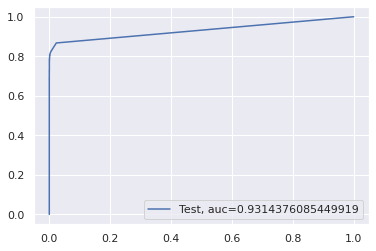

Model Accuracy: 0.9993855444953564
Confusion Matrix


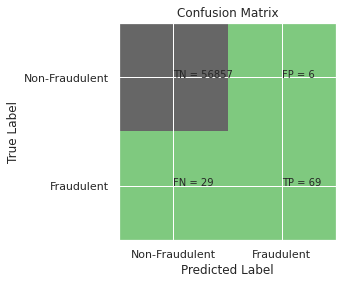

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56961
   macro avg       0.96      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.9807945125538037
XGBoost threshold: 0.0014997341204434633
ROC for the test dataset 98.1%


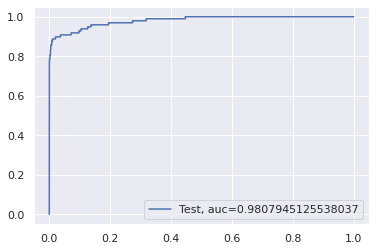

In [ ]:
Scores = run_logistic_model(Scores, "Stratified K-Fold Cross Validation", X_train_SKFold_cv, y_train_SKFold_cv, X_test_SKFold_cv, y_test_SKFold_cv)
Scores = run_tree_model(Scores, "Stratified K-Fold Cross Validation", X_train_SKFold_cv, y_train_SKFold_cv, X_test_SKFold_cv, y_test_SKFold_cv)
Scores = run_random_forest_model(Scores, "Stratified K-Fold Cross Validation", X_train_SKFold_cv, y_train_SKFold_cv, X_test_SKFold_cv, y_test_SKFold_cv)
Scores = run_XGBoost_model(Scores, "Stratified K-Fold Cross Validation", X_train_SKFold_cv, y_train_SKFold_cv, X_test_SKFold_cv, y_test_SKFold_cv)

In [ ]:
Scores[Scores['Imbalance_Handling_Method'] == 'Stratified K-Fold Cross Validation']

,Imbalance_Handling_Method,Model,ROC_value,Accuracy,Threshold
12,Stratified K-Fold Cross Validation,Logistic Regression with L1 Regularisation,0.981535,0.998947,0.010884
13,Stratified K-Fold Cross Validation,Logistic Regression with L2 Regularisation,0.982976,0.998771,0.001456
14,Stratified K-Fold Cross Validation,Tree Model with gini criteria,0.831360,0.998876,1.000000
15,Stratified K-Fold Cross Validation,Tree Model with entropy criteria,0.821226,0.998982,1.000000
16,Stratified K-Fold Cross Validation,Random Forest,0.931438,0.999456,0.010000
17,Stratified K-Fold Cross Validation,XGBoost,0.980795,0.999386,0.001500


__Observation:__

Performing different models on imbalance dataset suggests that the Logistic Regression with L2 Regularisation with Stratified K-Fold Cross Validation is the best with ROC value as 0.982974



Proceed with the model which shows the best result

Apply the best hyperparameter on the model 

Predict on the test dataset

"Logistic Regression with L2 Regularisation"

In [ ]:
# Logistic Regression

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold( n_splits= 10, shuffle= True, random_state= 50)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C,
          penalty= 'l2',
          scoring= 'roc_auc',
          cv=cv_num,
          random_state= 50,
          max_iter=10000,
          fit_intercept= True,
          solver= 'newton-cg',
          tol= 10)

searchCV_l2.fit(X_train, y_train)
print ('Maximum AUC & ROC score for L2:', searchCV_l2.scores_[1].mean(axis= 0).max())

print("Parameters for L2 Regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 

#finding predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)

#Finding predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred= y_pred_l2, y_true= y_test)

print("Accuracy of Logistic Regression with L2 Regularisation : {0}".format(Accuracy_l2))

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("L2 RIC value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("L2 Threshold: {0}".format(threshold))

Maximum AUC & ROC score for L2: 0.9841675373844799
Parameters for L2 Regularisations
[[-0.00778225  0.02772919 -0.09805761  0.24298351  0.06764088 -0.03476839
  -0.02673193 -0.11225314 -0.08227852 -0.16505794  0.14397903 -0.20793191
  -0.04356998 -0.36361647 -0.01538727 -0.09655137 -0.09783977 -0.00644835
   0.00559995 -0.00304222  0.0400725   0.01929768 -0.01905215 -0.00976852
  -0.01477596  0.0132442  -0.00387749 -0.00729922  0.03304086]]
[-7.41316571]
{1: array([[0.99645964, 0.99645964, 0.99645964, 0.99645964, 0.99645964,
        0.9965148 , 0.99870669, 0.99908304, 0.99933067, 0.99930737,
        0.99889793, 0.99889793, 0.99889793, 0.99889793, 0.99889793,
        0.99889793, 0.99889793, 0.99889793, 0.99889793, 0.99889793],
       [0.96562814, 0.96562678, 0.96562678, 0.96562678, 0.96562678,
        0.9658889 , 0.97658971, 0.9799837 , 0.97186201, 0.96117751,
        0.96117751, 0.96117751, 0.96117751, 0.96117751, 0.96117751,
        0.96117751, 0.96117751, 0.96117751, 0.96117751, 0.96

In [ ]:
searchCV_l2.coef_

array([[-0.00778225,  0.02772919, -0.09805761,  0.24298351,  0.06764088,
        -0.03476839, -0.02673193, -0.11225314, -0.08227852, -0.16505794,
         0.14397903, -0.20793191, -0.04356998, -0.36361647, -0.01538727,
        -0.09655137, -0.09783977, -0.00644835,  0.00559995, -0.00304222,
         0.0400725 ,  0.01929768, -0.01905215, -0.00976852, -0.01477596,
         0.0132442 , -0.00387749, -0.00729922,  0.03304086]])

In [ ]:
coeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coeff.columns = ['Feature','Importance Coefficient']

In [ ]:
coeff

,Feature,Importance Coefficient
0,V1,-0.007782
1,V2,0.027729
2,V3,-0.098058
3,V4,0.242984
4,V5,0.067641
5,V6,-0.034768
6,V7,-0.026732
7,V8,-0.112253
8,V9,-0.082279
9,V10,-0.165058


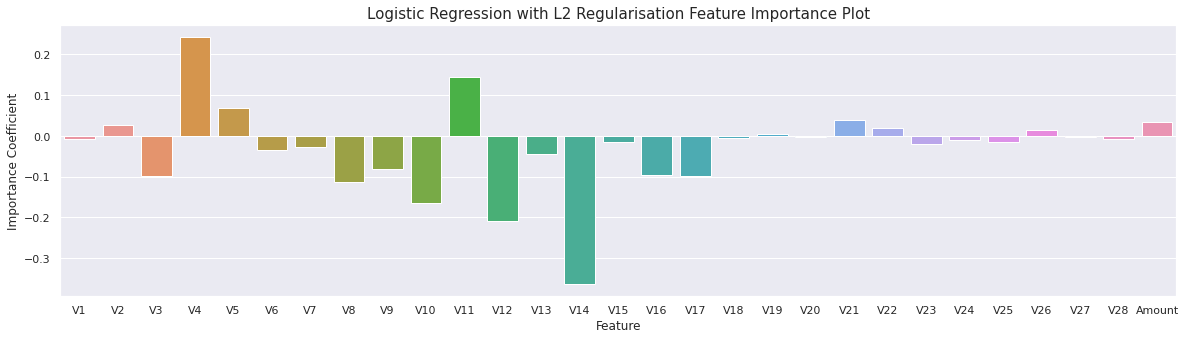

In [ ]:
#Plotting Feature Importance
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y= 'Importance Coefficient', data= coeff)
plt.title("Logistic Regression with L2 Regularisation Feature Importance Plot", fontsize=15)

plt.show()

__Observation:__

Top 3 features with positive coefficients are V4, V11 & v5 

Top 3 features with negative coefficients are V14, V12 & V10

Step 5: Model building with balancing Classes (Over Sampling)

Applying Class balancing with RandomOverSampler & Stratified K-Fold Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits= 5, random_state= 50)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy= 0.5)
    X_oversample, y_oversample= ROS.fit_sample(X_train, y_train)
  
#Creating DataFrame for X_oversample
X_oversample = pd.DataFrame(data= X_oversample, columns= cols)

Max AUC_ROC for L1: 0.5
Max AUC_ROC for L2: 0.986028811883757
Parameters for L1 Regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5,

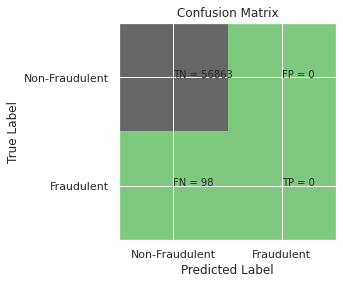

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 Regularisation: 0.9898702621091624
Confusion Matrix


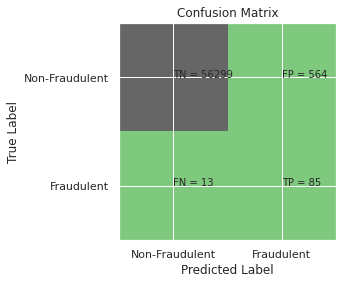

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

L1 ROC_value: 0.5
L1 threshold: 1.5
ROC value for the TEST dataset 50.0%


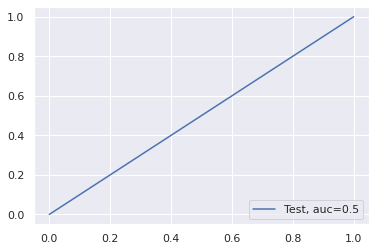

L2 ROC_value: 0.9805594326786866
L2 threshold: 0.26710580165937264
ROC value for the TEST dataset 98.1%


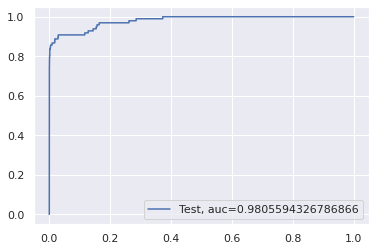

gini score: 0.9989993153210092
Confusion Matrix


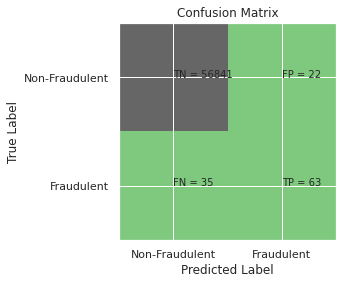

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8212351240198874
Tree threshold: 1.0
ROC value for the TEST dataset 82.1%


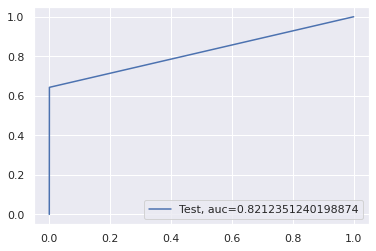

entropy score: 0.9989642035778866
Confusion Matrix


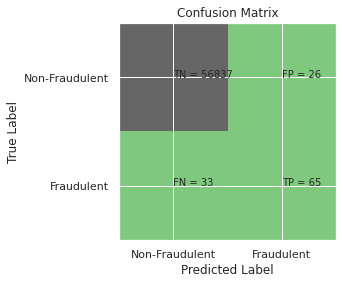

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.66      0.69        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.84     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.831404033396416
Tree threshold: 1.0
ROC value for the TEST dataset 83.1%


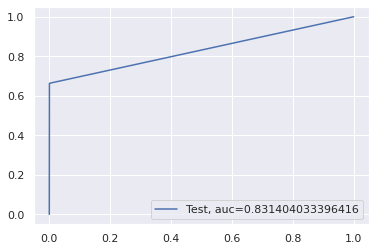

Model Accuracy: 0.9994557679816014
Confusion Matrix


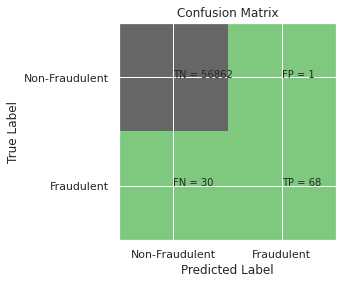

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC value: 0.9419398468284136
Random Forest Threshold: 0.01
ROC value for the test dataset 94.2%


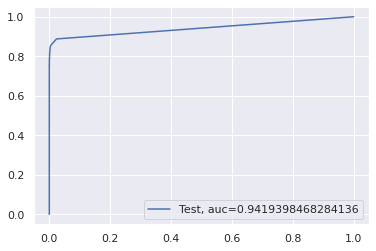

Model Accuracy: 0.9966643844033637
Confusion Matrix


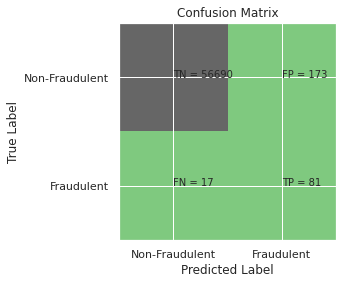

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.32      0.83      0.46        98

    accuracy                           1.00     56961
   macro avg       0.66      0.91      0.73     56961
weighted avg       1.00      1.00      1.00     56961

XGboost ROC value: 0.983484741521602
XGBoost threshold: 0.17383389174938202
ROC for the test dataset 98.3%


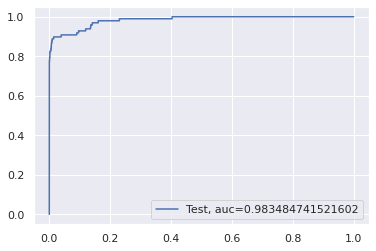

In [ ]:
Scores = run_logistic_model(Scores, "RandomOverSampling with Stratified K-Fold CV", X_oversample, y_oversample, X_test, y_test)
Scores = run_tree_model(Scores, "RandomOverSampling with Stratified K-Fold CV", X_oversample, y_oversample, X_test, y_test)
Scores = run_random_forest_model(Scores, "RandomOverSampling with Stratified K-Fold CV", X_oversample, y_oversample, X_test, y_test)
Scores = run_XGBoost_model(Scores, "RandomOverSampling with Stratified K-Fold CV", X_oversample, y_oversample, X_test, y_test)

In [ ]:
Scores[Scores['Imbalance_Handling_Method'] == 'RandomOverSampling with Stratified K-Fold CV']

,Imbalance_Handling_Method,Model,ROC_value,Accuracy,Threshold
18,RandomOverSampling with Stratified K-Fold CV,Logistic Regression with L1 Regularisation,0.500000,0.998280,1.500000
19,RandomOverSampling with Stratified K-Fold CV,Logistic Regression with L2 Regularisation,0.980559,0.989870,0.267106
20,RandomOverSampling with Stratified K-Fold CV,Tree Model with gini criteria,0.821235,0.998999,1.000000
21,RandomOverSampling with Stratified K-Fold CV,Tree Model with entropy criteria,0.831404,0.998964,1.000000
22,RandomOverSampling with Stratified K-Fold CV,Random Forest,0.941940,0.999456,0.010000
23,RandomOverSampling with Stratified K-Fold CV,XGBoost,0.983485,0.996664,0.173834


__Observation:__

Performing different models on balanced dataset suggests that the XGBoost with Random Oversampling with Stratified K-Fold Cross Validation is the best with highest ROC value & accuracy


Applying Class balancing with SMOTE

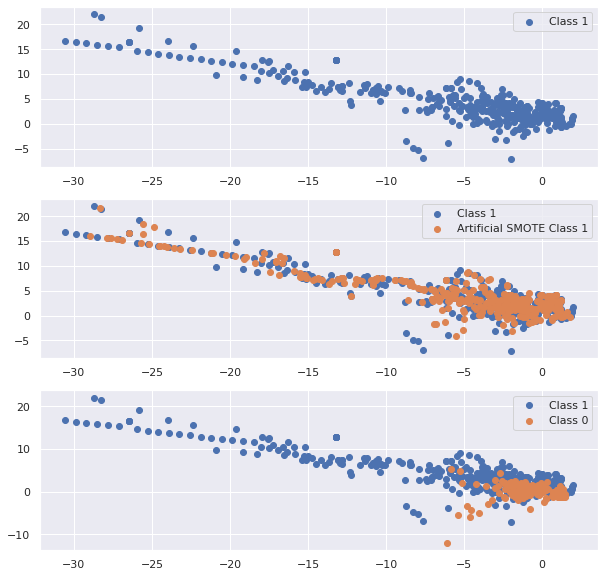

In [ ]:
SMOTE = over_sampling.SMOTE(random_state= 50)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label= 'Class 1')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label= 'Class 1')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1], label= 'Artificial SMOTE Class 1')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label= 'Class 1')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label= 'Class 0')
plt.legend()

#Creating SMOTE DataFrame
X_train_Smote = pd.DataFrame(data= X_train_Smote, columns= cols)

In [ ]:
skf = StratifiedKFold(n_splits= 5, random_state= 50)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state= 50)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe
X_train_Smote = pd.DataFrame(data= X_train_Smote, columns= cols)

Max AUC_ROC for L1: 0.5
Max AUC_ROC for L2: 0.9892856795938985
Parameters for L1 Regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5

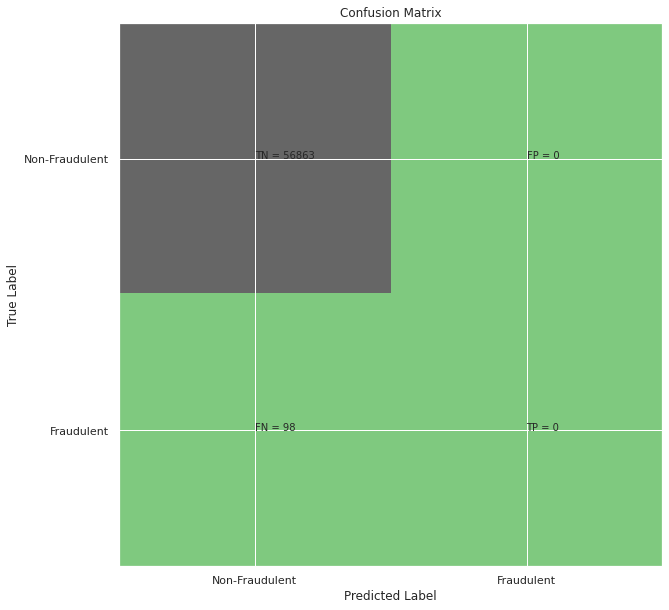

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 Regularisation: 0.978388722108109
Confusion Matrix


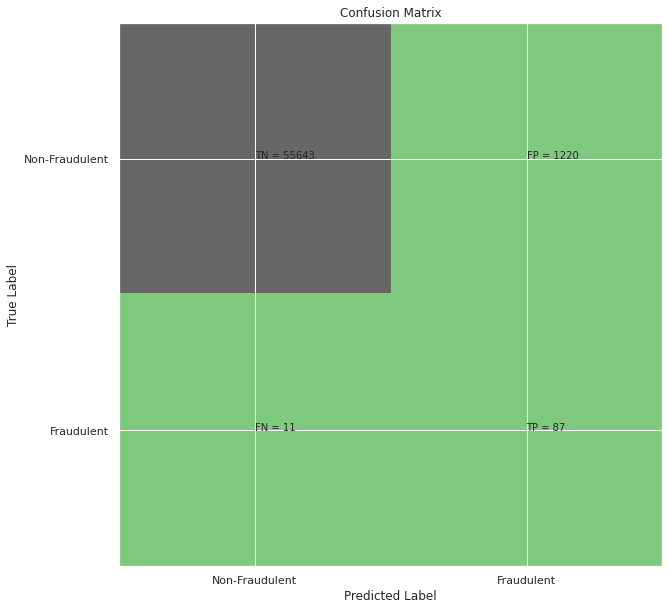

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.89      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961

L1 ROC_value: 0.5
L1 threshold: 1.5
ROC value for the TEST dataset 50.0%


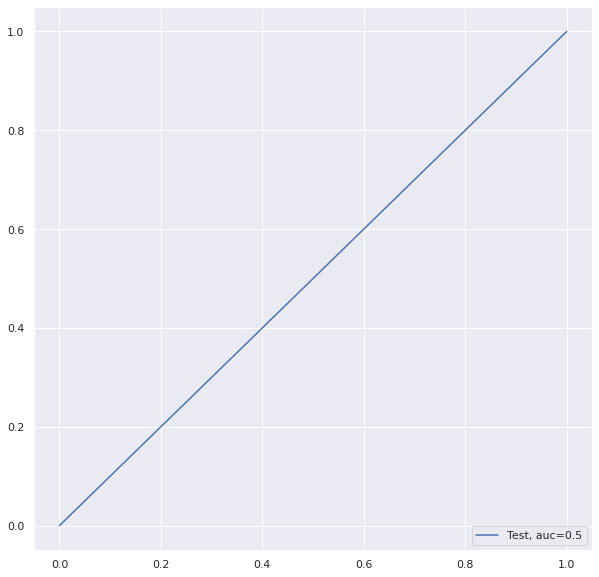

L2 ROC_value: 0.9787823364929742
L2 threshold: 0.46473625698350396
ROC value for the TEST dataset 97.9%


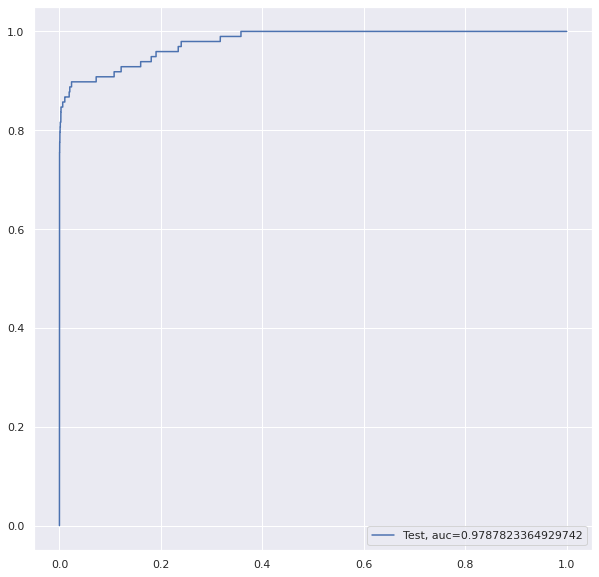

gini score: 0.9976124014676708
Confusion Matrix


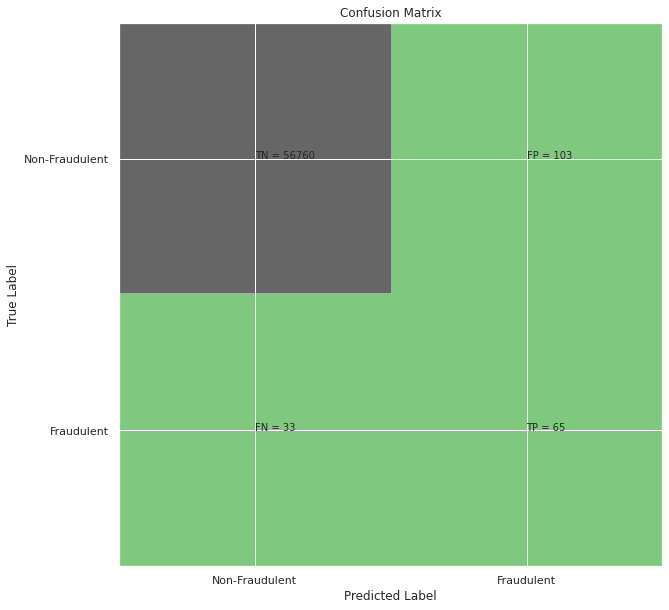

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.39      0.66      0.49        98

    accuracy                           1.00     56961
   macro avg       0.69      0.83      0.74     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8307269674660219
Tree threshold: 1.0
ROC value for the TEST dataset 83.1%


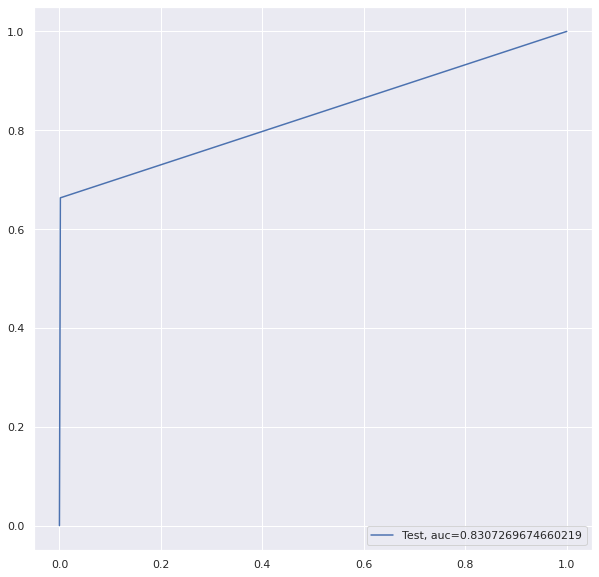

entropy score: 0.9976826249539158
Confusion Matrix


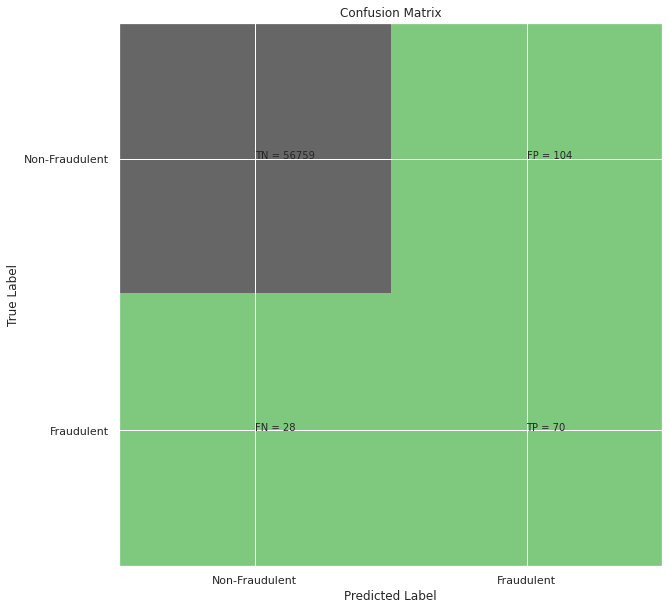

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.40      0.71      0.51        98

    accuracy                           1.00     56961
   macro avg       0.70      0.86      0.76     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8562283784836237
Tree threshold: 1.0
ROC value for the TEST dataset 85.6%


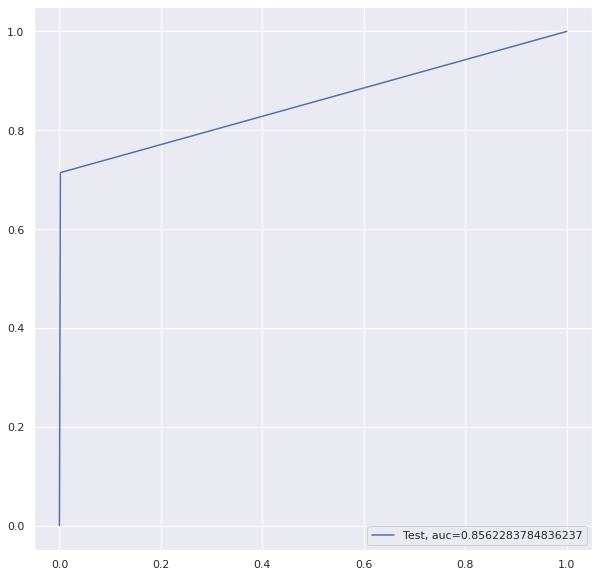

Model Accuracy: 0.9994733238531627
Confusion Matrix


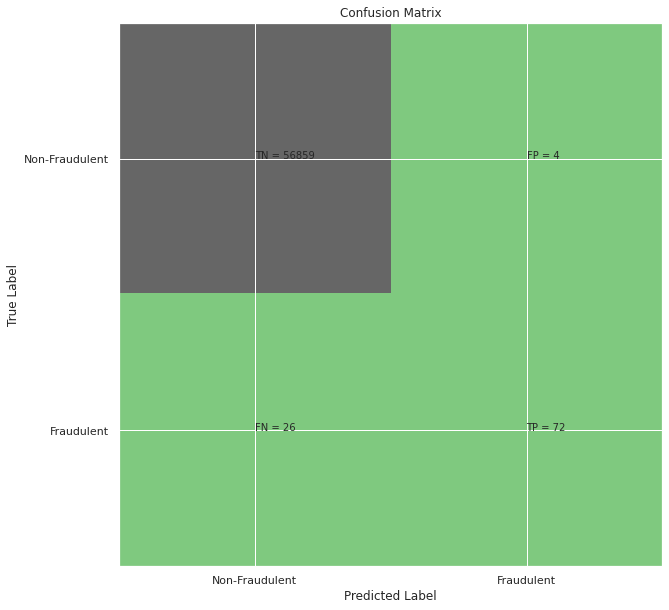

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.73      0.83        98

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC value: 0.9614958904089923
Random Forest Threshold: 0.06
ROC value for the test dataset 96.1%


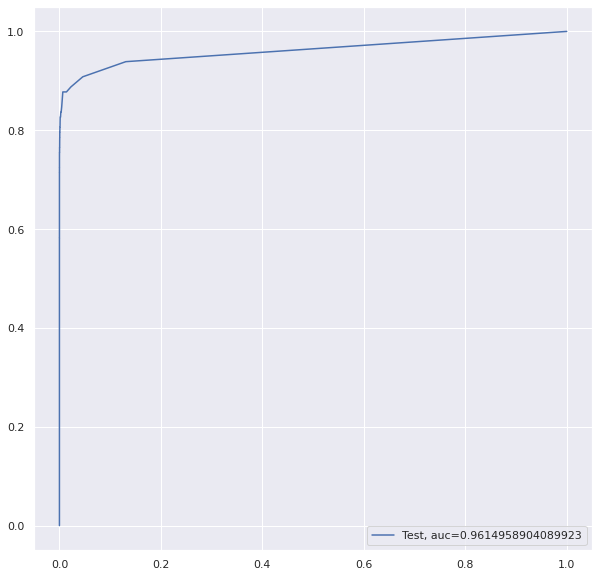

Model Accuracy: 0.9913976229349906
Confusion Matrix


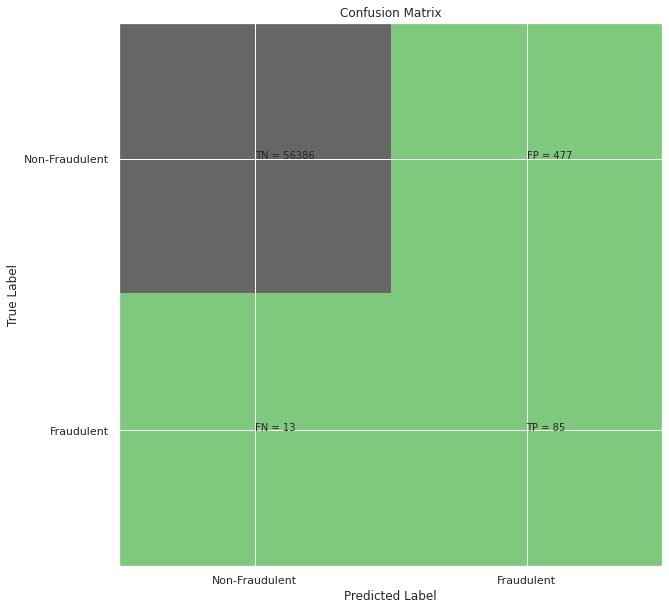

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.15      0.87      0.26        98

    accuracy                           0.99     56961
   macro avg       0.58      0.93      0.63     56961
weighted avg       1.00      0.99      0.99     56961

XGboost ROC value: 0.9751057590262597
XGBoost threshold: 0.5113633275032043
ROC for the test dataset 97.5%


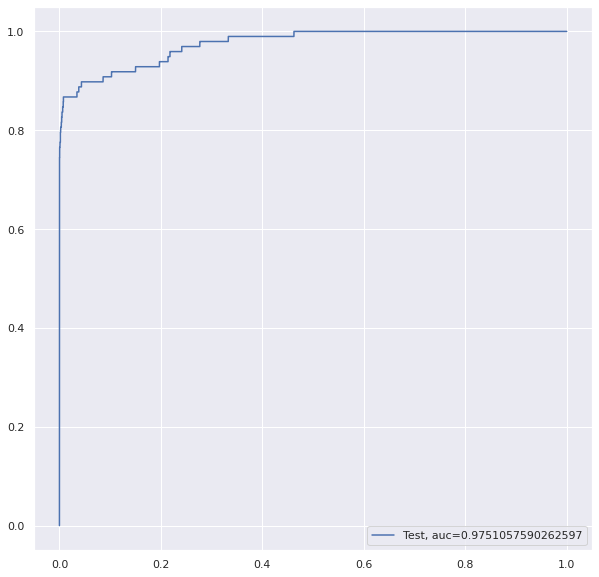

In [ ]:
Scores = run_logistic_model(Scores, "SMOTE OverSampling with Stratified K-Fold CV", X_train_Smote, y_train_Smote , X_test, y_test)
Scores = run_tree_model(Scores, "SMOTE OverSampling with Stratified K-Fold CV", X_train_Smote, y_train_Smote , X_test, y_test)
Scores = run_random_forest_model(Scores, "SMOTE OverSampling with Stratified K-Fold CV", X_train_Smote, y_train_Smote , X_test, y_test)
Scores = run_XGBoost_model(Scores, "SMOTE OverSampling with Stratified K-Fold CV", X_train_Smote, y_train_Smote , X_test, y_test)

In [ ]:
Scores[Scores['Imbalance_Handling_Method'] == 'SMOTE OverSampling with Stratified K-Fold CV']

,Imbalance_Handling_Method,Model,ROC_value,Accuracy,Threshold
24,SMOTE OverSampling with Stratified K-Fold CV,Logistic Regression with L1 Regularisation,0.500000,0.998280,1.500000
25,SMOTE OverSampling with Stratified K-Fold CV,Logistic Regression with L2 Regularisation,0.978782,0.978389,0.464736
26,SMOTE OverSampling with Stratified K-Fold CV,Tree Model with gini criteria,0.830727,0.997612,1.000000
27,SMOTE OverSampling with Stratified K-Fold CV,Tree Model with entropy criteria,0.856228,0.997683,1.000000
28,SMOTE OverSampling with Stratified K-Fold CV,Random Forest,0.961496,0.999473,0.060000
29,SMOTE OverSampling with Stratified K-Fold CV,XGBoost,0.975106,0.991398,0.511363


__Observation:__

Performing different models on balanced dataset suggests that the XGBoost & Logistic Regression with L2 Regularisation with SMOTE OverSampling with Stratified K-Fold Cross Validation are the best with ROC value & Accuracy values

Applying Class Balancing with ADASYN

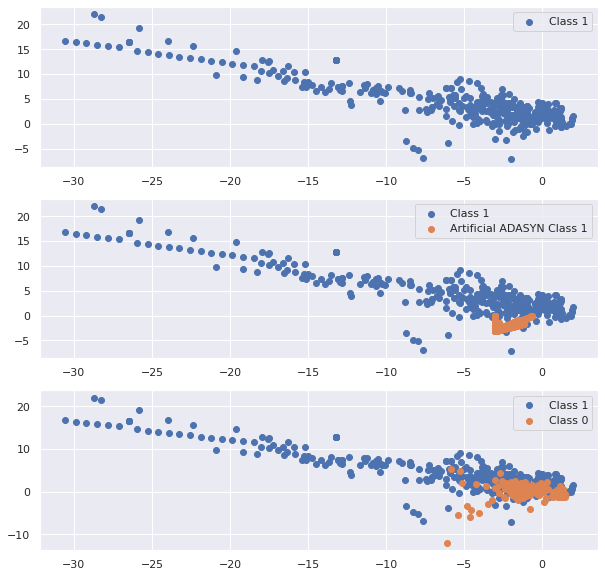

In [ ]:
ADASYN = over_sampling.ADASYN(random_state=50)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train== 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train== 0.0)]

plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Class 1')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Class 1')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class 1')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Class 1')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Class 0')
plt.legend()

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=50)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=50)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)

Max AUC_ROC for L1: 0.5
Max AUC_ROC for L2: 0.9592464462529607
Parameters for L1 Regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5

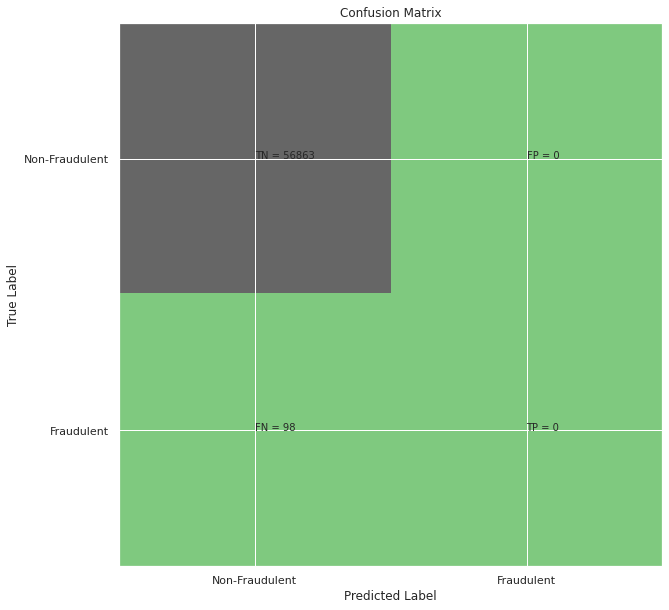

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 Regularisation: 0.9158547076069592
Confusion Matrix


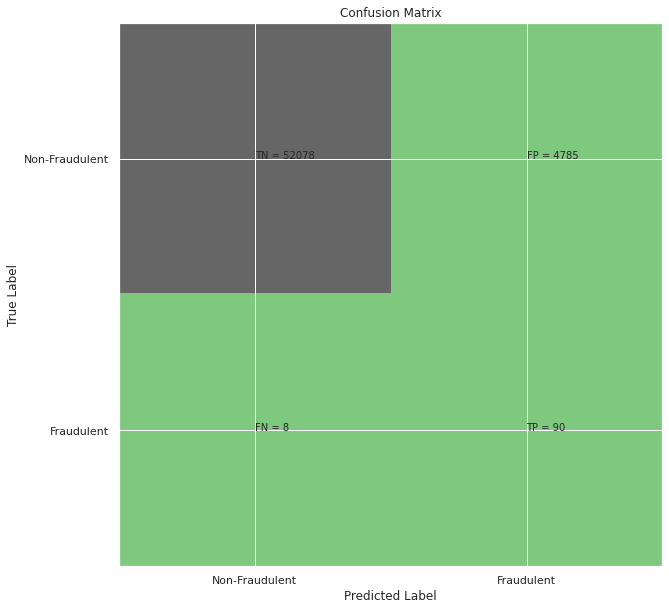

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56863
           1       0.02      0.92      0.04        98

    accuracy                           0.92     56961
   macro avg       0.51      0.92      0.50     56961
weighted avg       1.00      0.92      0.95     56961

L1 ROC_value: 0.5
L1 threshold: 1.5
ROC value for the TEST dataset 50.0%


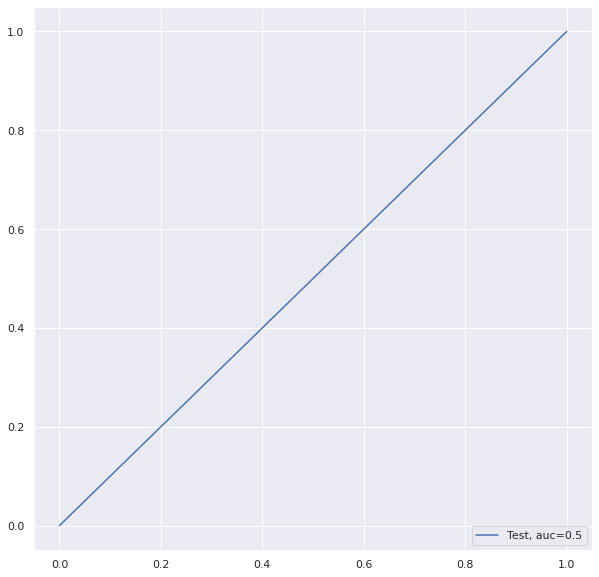

L2 ROC_value: 0.9798652292459463
L2 threshold: 0.7616503312676963
ROC value for the TEST dataset 98.0%


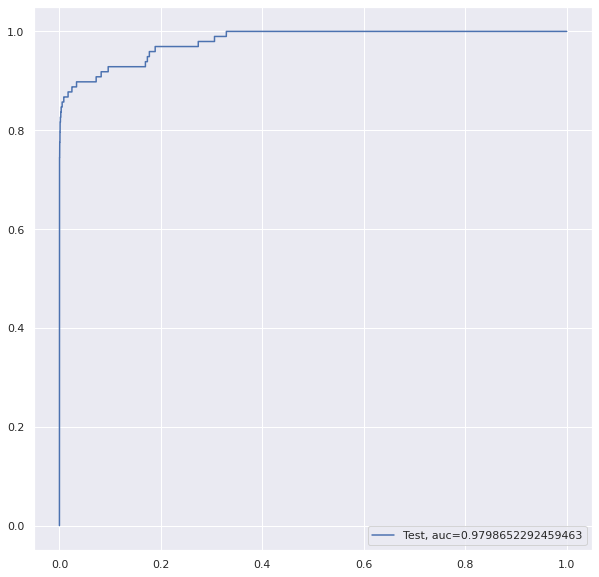

gini score: 0.9977352925685996
Confusion Matrix


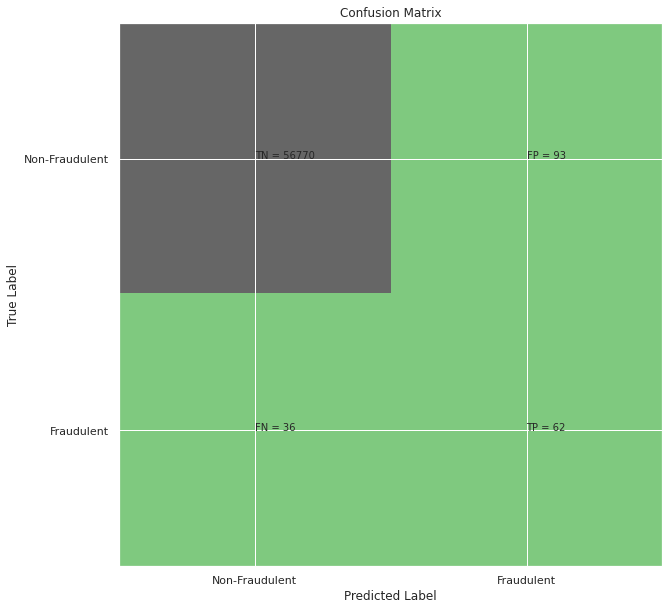

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.40      0.63      0.49        98

    accuracy                           1.00     56961
   macro avg       0.70      0.82      0.74     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8155087756573534
Tree threshold: 1.0
ROC value for the TEST dataset 81.6%


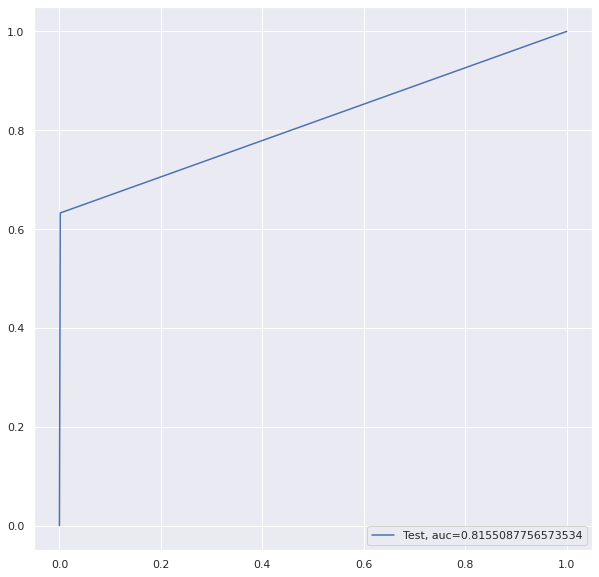

entropy score: 0.997770404311722
Confusion Matrix


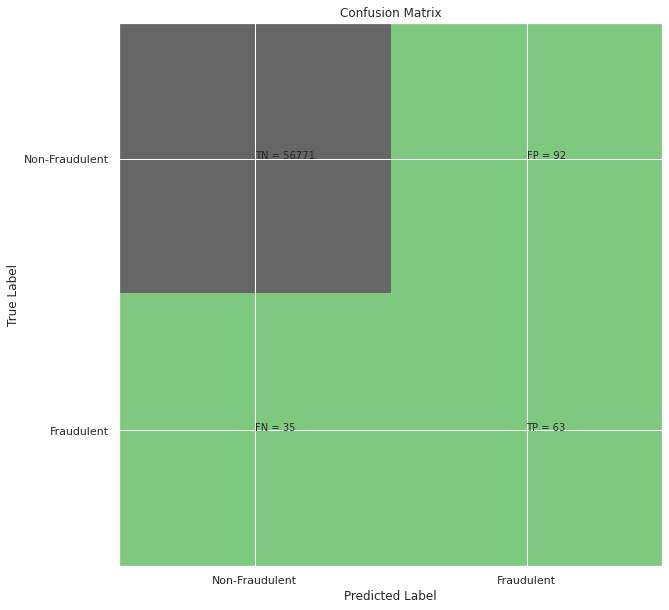

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.64      0.50        98

    accuracy                           1.00     56961
   macro avg       0.70      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8206196095377108
Tree threshold: 1.0
ROC value for the TEST dataset 82.1%


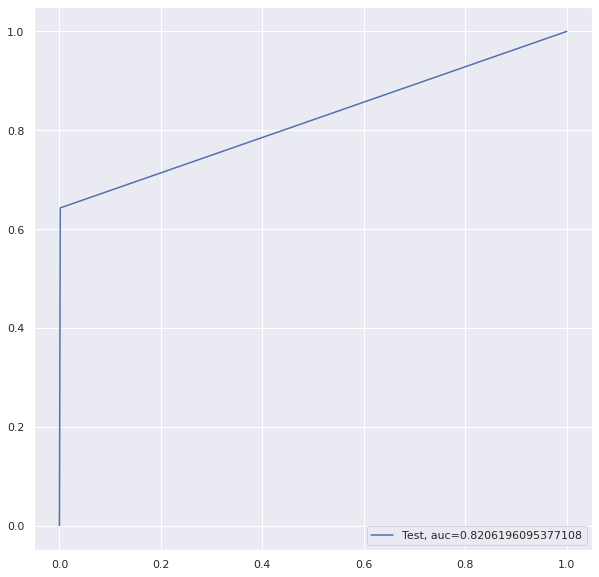

Model Accuracy: 0.9993855444953564
Confusion Matrix


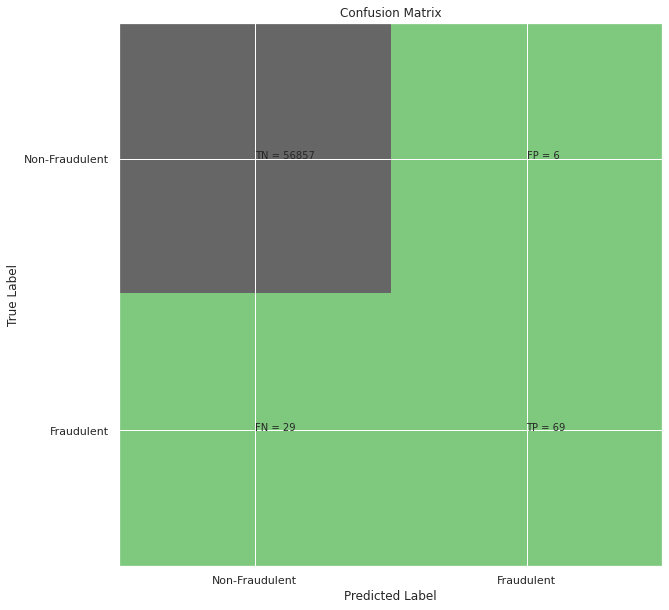

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56961
   macro avg       0.96      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC value: 0.9624670753587122
Random Forest Threshold: 0.04
ROC value for the test dataset 96.2%


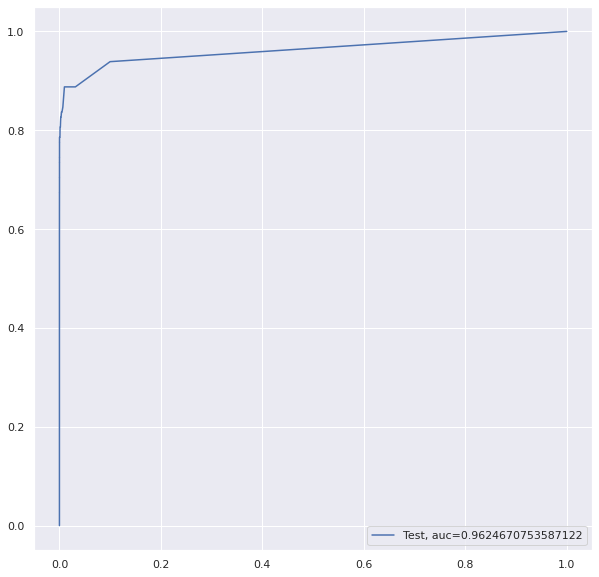

Model Accuracy: 0.9702954653183757
Confusion Matrix


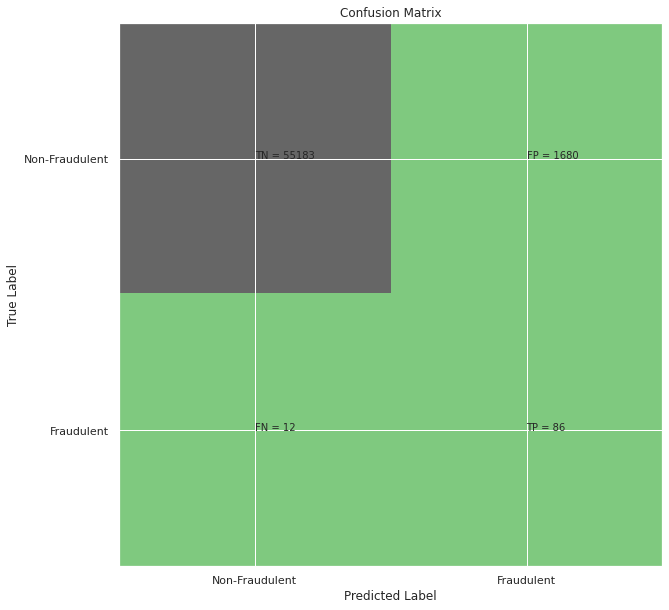

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.92      0.54     56961
weighted avg       1.00      0.97      0.98     56961

XGboost ROC value: 0.9716475725580316
XGBoost threshold: 0.6879151463508606
ROC for the test dataset 97.2%


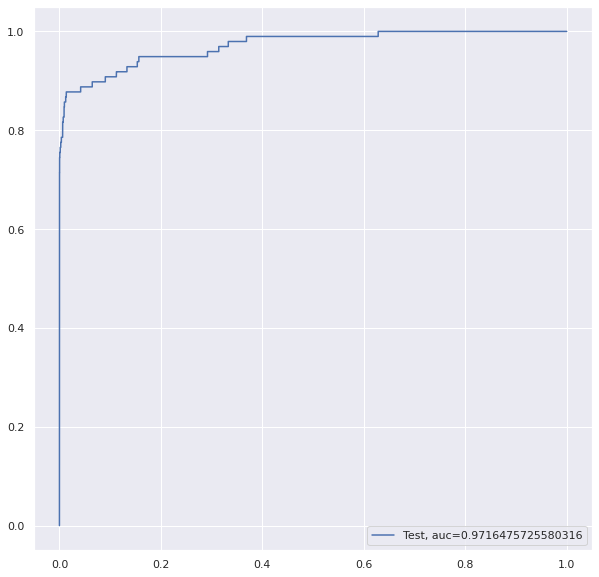

In [ ]:
Scores = run_logistic_model(Scores, "ADASYN OverSampling with Stratified K-Fold CV", X_train_ADASYN, y_train_ADASYN , X_test, y_test)
Scores = run_tree_model(Scores, "ADASYN OverSampling with Stratified K-Fold CV", X_train_ADASYN, y_train_ADASYN , X_test, y_test)
Scores = run_random_forest_model(Scores, "ADASYN OverSampling with Stratified K-Fold CV", X_train_ADASYN, y_train_ADASYN , X_test, y_test)
Scores = run_XGBoost_model(Scores, "ADASYN OverSampling with Stratified K-Fold CV", X_train_ADASYN, y_train_ADASYN , X_test, y_test)

In [ ]:
Scores[Scores['Imbalance_Handling_Method'] == 'ADASYN OverSampling with Stratified K-Fold CV']

,Imbalance_Handling_Method,Model,ROC_value,Accuracy,Threshold
30,ADASYN OverSampling with Stratified K-Fold CV,Logistic Regression with L1 Regularisation,0.500000,0.998280,1.500000
31,ADASYN OverSampling with Stratified K-Fold CV,Logistic Regression with L2 Regularisation,0.979865,0.915855,0.761650
32,ADASYN OverSampling with Stratified K-Fold CV,Tree Model with gini criteria,0.815509,0.997735,1.000000
33,ADASYN OverSampling with Stratified K-Fold CV,Tree Model with entropy criteria,0.820620,0.997770,1.000000
34,ADASYN OverSampling with Stratified K-Fold CV,Random Forest,0.962467,0.999386,0.040000
35,ADASYN OverSampling with Stratified K-Fold CV,XGBoost,0.971648,0.970295,0.687915


__Observation:__

Performing different models on balanced dataset suggests that XGBoost & Logistic Regression with L2 Regularisation with ADASYN OverSampling with Stratified K-Fold Cross Validation is the best looking at the ROC & Accuracy values

Applying Best Parameter Tuning for Final Model i.e XGBoost with Statified K-fold & Random Over Sampler

In [ ]:
xgb = XGBClassifier(base_score= 0.5, booster= 'gbtree', colsample_bylevel= 1,
              colsample_bynode= 1, colsample_bytree= 1, gamma= 0.1,
              learning_rate= 0.2, max_delta_step= 0, max_depth= 4,
              min_child_weight= 4, missing= None, n_estimators= 130, n_jobs= 1,
              nthread= None, objective= 'binary:logistic', random_state= 50,
              reg_alpha= 0, reg_lambda= 1, scale_pos_weight= 1, seed= None,
              silent= None, subsample= 1, verbosity= 1)
xgb.fit(X_oversample, y_oversample)
XGB_test_score = xgb.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
XGB_probs = xgb.predict_proba(X_test)[:, 1]
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("ROC_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold: {0}".format(threshold))

Model Accuracy : 0.9993679886237953
XGboost roc_value: 0.9836371845398554
XGBoost threshold: 0.0005431842873804271


__Observation:__

Model Accuracy : 0.9993679886237953

ROC value : 0.9836371845398554

Threshold: 0.0005431842873804271

Top Important features:

Best Feature = 14
Second Best Feature = 4
Third Best Feature = 12


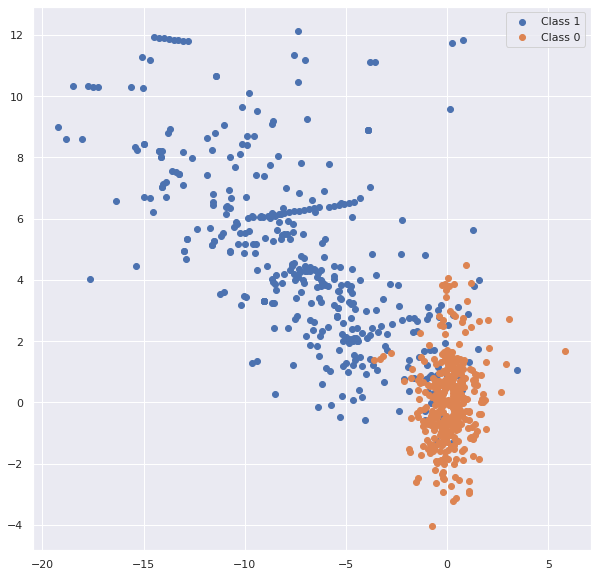

In [ ]:
impo = []
for i in xgb.feature_importances_:
    impo.append(i)
print('Best Feature =', impo.index(np.sort(xgb.feature_importances_)[-1])+1)
print('Second Best Feature =', impo.index(np.sort(xgb.feature_importances_)[-2])+1)
print('Third Best Feature =', impo.index(np.sort(xgb.feature_importances_)[-3])+1)

top_index = impo.index(np.sort(xgb.feature_importances_)[-1])
second_top_index = impo.index(np.sort(xgb.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)
plt.scatter(X_train_1[:, top_index], X_train_1[:, second_top_index], label= 'Class 1')
plt.scatter(X_train_0[:X_train_1.shape[0], top_index], X_train_0[:X_train_1.shape[0], second_top_index], label= 'Class 0')
plt.legend()

__Observation:__

Top Features: V14 > V10 > V4

__Conclusion:__

XGBoost model with Random Over-Sampling with Stratified K-Fold Cross Validation has provided best results. 

Model Accuracy : 0.9993679886237953

ROC value: 0.9836371845398554

Threshold: 0.0005431842873804271